<a href="https://colab.research.google.com/github/jenny-cobanaj/Field-Study-Project-Customer_Segmentation/blob/main/1_Preprocessing_CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Field Study Project Project  (Part 1 : Exploratory Data Analysis)
Athens University of Economics and Business

Msc in Business Analytics

Written by : Xheni Cobanaj (f2822117)

Supervisor : Mr Damianos Chatziantoniou

# "X" Food delivery app - Customer Segmentation

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Tzeni--Tsobanai-green.svg)](https://www.linkedin.com/in/tzeni-tsobanai)
[![GitHub](https://img.shields.io/badge/GitHub-Jenny--Cobanaj-purple.svg)](https://github.com/jenny-cobanaj)

---

"X" Food delivery app is a well-established online food delivery service that currently operates in numerous regions throughout Greece. The company was first introduced to the public in 2011 as a very promising startup operating in Athens and Thessaloniki. This platform allows customers to place orders with local restaurants via the «X» website or mobile app and have their food, drinks, or coffee delivered directly to their doorstep. Typically, orders are delivered for free or with a minor delivery fee.

---
<center><img width="60%" src="https://localinsider.storage.googleapis.com/2022/07/best-food-delivery-apps-.jpeg"></center>

## The Field Study Project

The goal of this field study project is to provide insights into the customer segmentation of the «X» food delivery app's users, to identify and better understand the different types of customers and their needs, behaviors, and preferences when it comes to food delivery services and to assist the company in making data-driven decisions to improve customer satisfaction and retention, increase revenue, and gain a competitive edge in the market.



First, let's explore the data at hand a little bit better to understand what the characteristics of an order are

## Description of Features 


*   customer_id : A unique identifier for each customer who placed an order
*   geographical_region_of_shop : The geographical region where the shop is 
located
*   shop_cuisine : The cuisine type of the shop (e.g. Italian, Japanese, etc.)
*   is_online_payment : A binary variable indicating whether the customer paid online or not
*   delivered_by_»X» : A binary variable indicating whether the order was delivered by «X» or not
*   first_order_at : The date and time of the customer's first order
*  order_from_pinata : A binary variable indicating whether the order was placed from Pinata (a loyalty program) or not
*   geographical_region_of_user : The geographical region where the customer is located
*   shop_city : The city where the shop is located
*   order_has_discount_coupon :A binary variable indicating whether the customer used a discount coupon for the order or not
*   order_id : A unique identifier for each order placed by a customer.
*   order_timestamp : The date and time when the order was placed
*   item_name : The name of the item(s) ordered by the customer
*   category_name : The category of the item(s) ordered by the customer (e.g. pizza, pasta, sushi, etc.)
*   item_price : The price of the item(s) ordered by the customer
*   item_quantity : The quantity of the item(s) ordered by the customer
*   shop_id : A unique identifier for the shop where the order was placed 
*   shop_is_chain : A binary variable indicating whether the shop is part of a chain or not
*   vertical The vertical of the shop (e.g. restaurant, grocery, pet shop etc.)
*   food_score : The food quality score given by the customer
*   service_score: The service quality score given by the customer
*  last_order_at : The date and time of the customer's last order
*   delivery_score : The delivery quality score given by the customer




























In [1]:
# importing all necessary modules
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from datetime import datetime
import re
import itertools
import string
import collections
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Data

In [109]:
df = pd.read_csv("/content/drive/MyDrive/customer_segmentation_Restaurant.csv",header=0,parse_dates= ['order_timestamp','last_order_at','first_order_at'])
print("Columns present in the data: ",[i for i in df.columns])
print("Number of data points: ",df.shape[0])
df.head()

Columns present in the data:  ['customer_id', 'order_id', 'order_timestamp', 'item_name', 'category_name', 'item_price', 'item_quantity', 'shop_id', 'shop_is_chain', 'vertical', 'delivered_by_efood', 'shop_cuisine', 'is_online_payment', 'order_has_discount_coupon', 'order_from_pinata', 'geographical_region_of_user', 'shop_city', 'geographical_region_of_shop', 'food_score', 'delivery_score', 'service_score', 'last_order_at', 'first_order_at']
Number of data points:  1448011


,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23 00:29:35+00:00,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,Restaurant,...,False,False,Λάρισα,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,Restaurant,...,False,False,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26
2,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,φιλετίνια κοτόπουλου πανέ ατομική,Φρέσκες σαλάτες ατομικές,3.10,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,Restaurant,...,False,False,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26
3,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22
4,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22


In [110]:
"The 'X' delivery app dataset contains {} columns and {} rows".format(df.shape[1],df.shape[0])

"The 'X' delivery app dataset contains 23 columns and 1448011 rows"

In [111]:
# Time period
print('Snapshot of study for the customer segmentation model:', df.order_timestamp.min(), ' - ', df.order_timestamp.max())

Snapshot of study for the customer segmentation model: 2021-04-01 00:00:16+00:00  -  2021-05-31 23:59:51+00:00


Printing all values for our categorical features :

In [112]:
cols=['item_name','category_name','shop_is_chain','vertical','delivered_by_efood', 'shop_cuisine',
      'is_online_payment','order_has_discount_coupon','order_from_pinata','geographical_region_of_user','shop_city','geographical_region_of_shop']
# Prinintg all unique values of the objects data types in the dataset
for column in df[cols]:
   print(column,"\n--------------------------")
   print(df[column].unique())
   print("\n------------------------------")

item_name 
--------------------------
['ποικιλία κρεάτων 2 ατόμων' 'κοτόπουλο παϊδάκια σχάρας το κιλό'
 'φιλετίνια κοτόπουλου πανέ ατομική' ... 'χορτόπιτα μπουρέκι'
 'σπαγγέτι καρούζο' 'λαζάνια με κιμά (φρέσκο φύλλο)']

------------------------------
category_name 
--------------------------
['Μερίδες της ώρας' 'Με το κιλό' 'Φρέσκες σαλάτες ατομικές' ...
 'Vitamin point' 'Noodles combo 2 Coca-Cola deals' 'Toast | Hot dogs']

------------------------------
shop_is_chain 
--------------------------
[False  True]

------------------------------
vertical 
--------------------------
['Restaurant']

------------------------------
delivered_by_efood 
--------------------------
[False  True]

------------------------------
shop_cuisine 
--------------------------
['Σουβλάκια' 'Καφέδες' 'Brunch' 'Burgers' 'Αρτοποιήματα' 'Κουλούρια'
 'Κρέπες' 'Pizza' 'Sandwich' 'Μαγειρευτά' 'Μπουγάτσα' 'Κοτόπουλα' 'Sushi'
 'Ζυμαρικά' 'Σφολιάτες' 'Ψητά - Grill' 'Kebab' 'Cocktails' 'Ελληνική'
 'Ζαχαροπλαστείο' 'Σα

## Number of orders, customers and restaurants in the data available

In [113]:
#check quantities
pd.DataFrame([{'orders': len(df['order_id'].value_counts()),    
               'customers': len(df['customer_id'].value_counts()),
               'restaurants': len(df['shop_id'].value_counts()),  
              }], columns = ['orders', 'customers', 'restaurants'], index = ['quantity'])

,orders,customers,restaurants
quantity,575013,24998,11751


## Preprocessing Part

### Cleaning of Data from special characters,numbers and converting letters to lowercase

In [ ]:
# def text_cleaning(text):
  
#   # make all characters lowercase
#   #text = text.lower()

#   # removing character 
#   #text = text.replace("-"," ") 

#   # removing Punctation
#   text = re.sub('[%s]*' % string.punctuation, '',text)

#   # removing numbers
#   text = re.sub('[0-9]+','', text)
#   #text=re.sub("[^A-Za-z]","",text)
 
#   # removing big spaces
#   #text = re.sub(' +', ' ', text) 
#   #return unidecode.unidecode(text.decode('utf-8'))
  
#   return(text) 

### Checking the type of each of the features in our data

In [114]:
df.dtypes

customer_id                                 object
order_id                                    object
order_timestamp                datetime64[ns, UTC]
item_name                                   object
category_name                               object
item_price                                 float64
item_quantity                                int64
shop_id                                     object
shop_is_chain                                 bool
vertical                                    object
delivered_by_efood                            bool
shop_cuisine                                object
is_online_payment                             bool
order_has_discount_coupon                     bool
order_from_pinata                             bool
geographical_region_of_user                 object
shop_city                                   object
geographical_region_of_shop                 object
food_score                                 float64
delivery_score                 

In [ ]:
# df['geographical_region_of_shop'] = df['geographical_region_of_shop'].apply(text_cleaning)
# df['geographical_region_of_user'] = df['geographical_region_of_user'].apply(text_cleaning)
# df['shop_city'] = df['shop_city'].apply(text_cleaning)

### Missing values treatment

In [115]:
# This will give us the total number of missing values feature-wise
print(df.isnull().sum())

customer_id                          0
order_id                             0
order_timestamp                      0
item_name                           28
category_name                      393
item_price                           0
item_quantity                        0
shop_id                              0
shop_is_chain                        0
vertical                             0
delivered_by_efood                   0
shop_cuisine                         0
is_online_payment                    0
order_has_discount_coupon            0
order_from_pinata                    0
geographical_region_of_user       2347
shop_city                            0
geographical_region_of_shop       1051
food_score                     1426198
delivery_score                 1425888
service_score                  1425889
last_order_at                        0
first_order_at                       0
dtype: int64


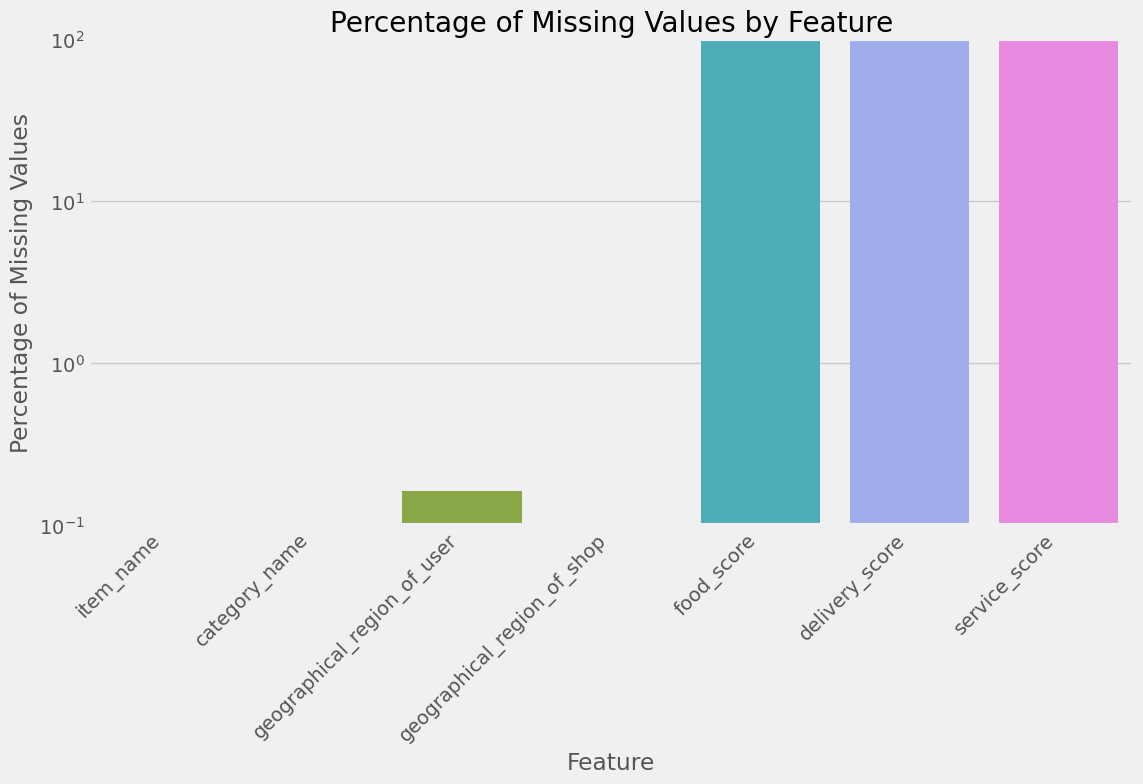

In [118]:
# Find columns with missing values
columns_with_missing = df.columns[df.isnull().sum() > 0]

# Calculate percentage of missing values for each column
missing_percentage = df[columns_with_missing].isnull().mean() * 100

# Filter columns with at least one missing value
columns_to_plot = missing_percentage[missing_percentage > 0].index

# Create barplot with log scale on y-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=columns_to_plot, y=missing_percentage[columns_to_plot])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Feature')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')

# Set y-axis to log scale
plt.yscale('log')
plt.ylim(0.1, 100)  # Set y-axis limit to 0.1-100 to avoid log(0) error

plt.show()

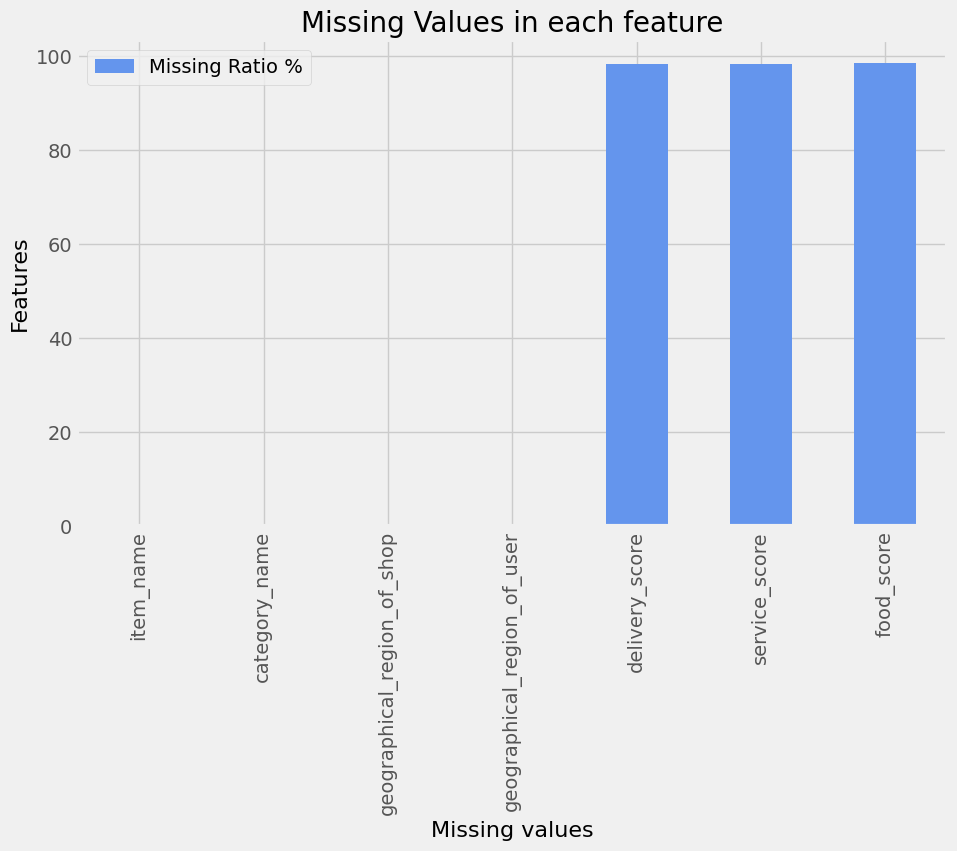

In [119]:
plot_width, plot_height = (10, 6)
plt.rcParams['figure.figsize'] = (plot_width, plot_height)
plt.style.use('fivethirtyeight')
def plot_nas(df: pd.DataFrame):
   if df.isnull().sum().sum() != 0:
      na_df = (df.isnull().sum() / len(df)) * 100
      na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending = True)
      missing_data = pd.DataFrame({'Missing Ratio %': na_df})
      missing_data.plot(kind = "bar",color='cornflowerblue')
      plt.title('Missing Values in each feature',fontsize=20,color='black')
      plt.ylabel('Features',fontsize = 16,color='black')
      plt.xlabel('Missing values',fontsize = 16,color='black')
      plt.show()
   else :
      print('No NAs found')
plot_nas(df)

In [120]:
#convert type of features to str in order to use the text_cleaning function which is comprised of the re.sub method mostly
df.geographical_region_of_shop=df.geographical_region_of_shop.astype(str)
df.geographical_region_of_user=df.geographical_region_of_user.astype(str)
df.shop_city=df.shop_city.astype(str)

In [121]:
df_clean=df.copy()

## Handling item_name column

The only values missing from item name are those with category name as NAAN BREAD and cuisine= Indian, apparently there is a mixup with nan and naan values


In [17]:
df_clean[df_clean.item_name.isna()]

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
4755,f509f69b8354249cb8f22d15e6d9ff29,570d1c2ec9279b1d0ea74165a86228f3,2021-05-13 16:03:54+00:00,NaN,Naan,2.0,1,ce3c190a1b68cae7d020b9f8f87eb74c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Άνω Γλυφάδα,NaN,NaN,NaN,2021-05-28,2016-08-28
27797,c3e4e1af31637de0f72d3e2526dad09f,1dda68b25566acefe6cf60c3526bdaee,2021-04-01 19:33:18+00:00,NaN,Bread,1.5,1,34864d8ec4148fbe96805aa995be6472,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Άνω Πατήσια,NaN,NaN,NaN,2021-05-30,2019-01-26
108969,67230fd076e49f0b39496cbab659566e,d5c20be4d3b1eb282305fca9c0a72232,2021-05-19 18:57:17+00:00,NaN,Naan (Baked bread),2.0,1,3c94bd11c9b43e1503546d05cc739200,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Πατήσια-Πλατεία Αμερικής,NaN,NaN,NaN,2021-05-30,2019-10-31
108974,87c57c691902a6332ba905476283af71,8ce4ef95190a5bd85f68512d0505c40a,2021-05-15 20:17:31+00:00,NaN,Naan,2.0,1,ce3c190a1b68cae7d020b9f8f87eb74c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Γλυφάδα,NaN,NaN,NaN,2021-05-23,2017-06-29
109266,2a38dbe2d36b9d7709ce3feb06565660,85c247a82c26e5775414f0ac79f08007,2021-04-04 19:40:36+00:00,NaN,Bread,1.5,2,34864d8ec4148fbe96805aa995be6472,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Γκύζη-Νέα Φιλοθέη,NaN,NaN,NaN,2021-05-29,2019-04-29
136402,d0191ae14a9f8b955f497c93bd04bb3a,773d548096865e8f1396b9d8de706826,2021-05-15 15:29:35+00:00,NaN,Naan (Baked bread),2.0,2,3c94bd11c9b43e1503546d05cc739200,False,Restaurant,...,False,True,Αθήνα,Αθήνα,Αθήνα-Ρούφ-Βοτανικός,NaN,NaN,NaN,2021-05-29,2016-01-03
178304,31cd77a543e0d02514c3aae0a2e6fef2,e83bdfd945aa45bc0aec489a7167b94f,2021-05-15 14:25:11+00:00,NaN,Ναν πίτα προσφοράς,2.2,1,ce3c190a1b68cae7d020b9f8f87eb74c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Γλυφάδα,NaN,NaN,NaN,2021-05-23,2016-03-22
221802,663de416f10c78fb94bee10bca9d3c8f,a706f4f2f10cf4e9c8f68f510d10da53,2021-05-15 15:33:46+00:00,NaN,Naan (Baked bread),2.0,1,3c94bd11c9b43e1503546d05cc739200,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Κουκάκι,NaN,NaN,NaN,2021-05-30,2016-06-07
236238,6d349386d03acc426ae78841874833aa,978337b646845a61ee902672df0c9859,2021-04-08 22:13:43+00:00,NaN,Ναν πίτα προσφοράς,2.2,1,ce3c190a1b68cae7d020b9f8f87eb74c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Βούλα,NaN,NaN,NaN,2021-05-12,2016-01-09
312846,87bb761111959165de8f1d085ba45ba0,e7b81b6b781cd9ce1702365ffae0ce53,2021-04-05 23:21:15+00:00,NaN,Bread,1.5,1,34864d8ec4148fbe96805aa995be6472,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Αμπελόκηποι-Πανόρμου,NaN,NaN,NaN,2021-05-30,2016-04-17


In [18]:
#df_clean[df_clean.item_name=='naan bread']
df_clean.item_name.fillna('naan bread', inplace=True)

In [19]:
df_clean[df_clean.category_name.str.contains('Naan',na=False)]

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
4755,f509f69b8354249cb8f22d15e6d9ff29,570d1c2ec9279b1d0ea74165a86228f3,2021-05-13 16:03:54+00:00,naan bread,Naan,2.0,1,ce3c190a1b68cae7d020b9f8f87eb74c,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Άνω Γλυφάδα,NaN,NaN,NaN,2021-05-28,2016-08-28
8313,1669e1ed6a1cb836bcd6103fb2bfc47c,bc1b67ea2e995bb4665e3f8dc74db0cb,2021-05-16 16:10:17+00:00,plain naan,Πίτες | Naan,1.8,1,612d1d91c87e0a19c048f3daa38676fd,True,Restaurant,...,False,False,Αθήνα,Αθήνα,Χαλάνδρι-Πολύδροσο,NaN,NaN,NaN,2021-05-30,2016-05-01
9791,f79cae047d8ef3f6ada9c76f4696b6eb,22fe594e573927850fb882fb5c0e7fb7,2021-05-29 22:41:39+00:00,mix chili naan,Naan | Πίτες,2.5,1,e2808200b0fe6d409861461aeaa7e42f,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αιγάλεω-Ανατολικά,NaN,NaN,NaN,2021-05-29,2016-01-04
9938,fdf51e21025d2018ced72501936fdab2,5e385b3daa7a19eae1a7a2a032411e37,2021-04-13 14:00:08+00:00,garlic nan,Naan,3.0,1,995fcbc48c663566151d80c2c9bba1d9,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Χολαργός-Παπάγου,NaN,NaN,NaN,2021-05-28,2016-04-09
11353,d661f662c2a507cb6ec76f9db304f8a0,d257fb6bd5ee458d98f523d71af0f816,2021-04-30 21:54:40+00:00,garlic naan,Naan | Πίτες,2.5,1,e2808200b0fe6d409861461aeaa7e42f,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Άλιμος,NaN,NaN,NaN,2021-05-30,2017-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428900,d9d923ccc7a6aeb6b52fa8bc942c6679,768576ef6f6eb403ecaf5d8071d1eef6,2021-05-31 22:23:58+00:00,paneer naan,Naan | Πίτες,2.5,1,7463bbc87e32112d9b0ba7143567232d,False,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Αμπελόκηποι-Μιχαλακοπούλου-Κατεχάκη,NaN,NaN,NaN,2021-05-29,2018-11-02
1442878,3ad2a78ea80689221d55388f939df907,aff35334894b6b72ee4f4f206c8ca324,2021-05-20 22:16:32+00:00,cheese & potato naan,Πίτες | Naan,3.2,1,e50ba36885235f7c8301a79ba7dce71f,True,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Αμπελόκηποι-Πανόρμου,NaN,NaN,NaN,2021-05-30,2016-04-28
1442882,3ad2a78ea80689221d55388f939df907,aff35334894b6b72ee4f4f206c8ca324,2021-05-20 22:16:32+00:00,plain naan,Πίτες | Naan,1.8,1,e50ba36885235f7c8301a79ba7dce71f,True,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Αμπελόκηποι-Πανόρμου,NaN,NaN,NaN,2021-05-30,2016-04-28
1442886,3ad2a78ea80689221d55388f939df907,aff35334894b6b72ee4f4f206c8ca324,2021-05-20 22:16:32+00:00,kashmir sweet naan bread,Πίτες | Naan,3.8,1,e50ba36885235f7c8301a79ba7dce71f,True,Restaurant,...,False,False,Αθήνα,Αθήνα,Αθήνα-Αμπελόκηποι-Πανόρμου,NaN,NaN,NaN,2021-05-30,2016-04-28


## Geographical Region of User and Shop city Features

In [20]:
df_clean['geographical_region_of_user'].equals(df_clean['shop_city'])

False

We have decided to replace "nan" with empty string,because it does not appear as null otherwise,then assign Nan to empty strings


In [21]:
df_clean['geographical_region_of_user'] = df_clean['geographical_region_of_user'].replace(['nan'], '')
df_clean.geographical_region_of_user = df_clean.geographical_region_of_user.replace(r'^\s*$', np.nan, regex=True)

There are 2347 null values in geographical region of user


In [22]:
df_clean[df_clean.geographical_region_of_user.isna()]

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
566,45202bd82f861f57d1fbb418cc74d4cb,09a80893b72b16cd974256c1c0c55c68,2021-04-30 18:59:57+00:00,καλαμάκι μανιτάρι,Menu Σαρακοστής,1.6,1,d92371d22c70b12972720001cc04ef8e,True,Restaurant,...,False,True,NaN,Πειραιάς,Πειραιάς-Δραπετσώνα,NaN,NaN,NaN,2021-05-28,2020-12-18
567,45202bd82f861f57d1fbb418cc74d4cb,09a80893b72b16cd974256c1c0c55c68,2021-04-30 18:59:57+00:00,vegan box,Menu Σαρακοστής,7.9,1,d92371d22c70b12972720001cc04ef8e,True,Restaurant,...,False,True,NaN,Πειραιάς,Πειραιάς-Δραπετσώνα,NaN,NaN,NaN,2021-05-28,2020-12-18
568,45202bd82f861f57d1fbb418cc74d4cb,09a80893b72b16cd974256c1c0c55c68,2021-04-30 18:59:57+00:00,φαλάφελ σε πίτα,Menu Σαρακοστής,2.6,1,d92371d22c70b12972720001cc04ef8e,True,Restaurant,...,False,True,NaN,Πειραιάς,Πειραιάς-Δραπετσώνα,NaN,NaN,NaN,2021-05-28,2020-12-18
569,45202bd82f861f57d1fbb418cc74d4cb,09a80893b72b16cd974256c1c0c55c68,2021-04-30 18:59:57+00:00,νερό 500ml,Αναψυκτικά,0.5,1,d92371d22c70b12972720001cc04ef8e,True,Restaurant,...,False,True,NaN,Πειραιάς,Πειραιάς-Δραπετσώνα,NaN,NaN,NaN,2021-05-28,2020-12-18
570,45202bd82f861f57d1fbb418cc74d4cb,09a80893b72b16cd974256c1c0c55c68,2021-04-30 18:59:57+00:00,μπιφτέκι λαχανικών σε πίτα,Menu Σαρακοστής,2.6,1,d92371d22c70b12972720001cc04ef8e,True,Restaurant,...,False,True,NaN,Πειραιάς,Πειραιάς-Δραπετσώνα,NaN,NaN,NaN,2021-05-28,2020-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447638,8a11ce3c94bdc313325bf5f53685b52f,2551c371359d113aef252c28ff17c3e9,2021-04-09 13:26:38+00:00,βίκος γκαζόζα 330ml,Αναψυκτικά Βίκος προσφοράς 330ml,1.0,1,f820c86de39b24a63a0a2902b7e522da,False,Restaurant,...,False,False,NaN,Κομοτηνή,Κομοτηνή,NaN,NaN,NaN,2021-05-27,2018-10-08
1447639,8a11ce3c94bdc313325bf5f53685b52f,2551c371359d113aef252c28ff17c3e9,2021-04-09 13:26:38+00:00,chef,Σαλάτες,4.5,1,f820c86de39b24a63a0a2902b7e522da,False,Restaurant,...,False,False,NaN,Κομοτηνή,Κομοτηνή,NaN,NaN,NaN,2021-05-27,2018-10-08
1448005,4e6ab3dfff3219ffbfa26b8a2231f1a5,90260a55a7310e58a9ec1e68fd93c87e,2021-05-31 14:11:04+00:00,πιτάκι καλαμποκιού,Ορεκτικά,0.4,1,cdbca39d5affb98cb346d0a09cbf75d2,True,Restaurant,...,False,False,NaN,Αθήνα,Άλιμος,NaN,NaN,NaN,2021-05-25,2016-01-09
1448006,4e6ab3dfff3219ffbfa26b8a2231f1a5,90260a55a7310e58a9ec1e68fd93c87e,2021-05-31 14:11:04+00:00,μπιφτέκι μοσχαρίσιο,Τεμάχια,1.8,2,cdbca39d5affb98cb346d0a09cbf75d2,True,Restaurant,...,False,False,NaN,Αθήνα,Άλιμος,NaN,NaN,NaN,2021-05-25,2016-01-09


### Replacement of the geographical region of user with the shop city value for those orders that the value is missing

If a value is missing in the geographical region of user column replace in with the value from shop city column


In [23]:
df_clean.geographical_region_of_user.fillna(df_clean.shop_city, inplace=True)

In [24]:
df_clean.geographical_region_of_user.value_counts()

Αθήνα             817252
Θεσσαλονίκη       151859
Πειραιάς          103398
Ηράκλειο Κρήτη     45849
Πάτρα              41379
                   ...  
Τήνος                  5
Αριδαία                4
Αράχωβα                4
Νάξος                  3
Αμαλιάδα               2
Name: geographical_region_of_user, Length: 116, dtype: int64

Only the following records differ in the geographical region of user and shop city attributes. Therefore the replacement that was done seems like an appropriate choice  


In [26]:
df_clean.loc[~(df_clean['geographical_region_of_user'] == df_clean['shop_city'])]

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
10,ae13c51311a65fe67b4ad7ce278853e0,76cffe53374cbf27f86bf8a716f2beb4,2021-05-05 10:05:10+00:00,freddo cappuccino,Καφέδες,2.0,1,2f38b3925d4db2a311576540bee25572,True,Restaurant,...,False,False,Πειραιάς,Αθήνα,Πειραιάς-Καμίνια-Κοκκινιά,NaN,NaN,NaN,2021-05-30,2020-03-03
11,ae13c51311a65fe67b4ad7ce278853e0,76cffe53374cbf27f86bf8a716f2beb4,2021-05-05 10:05:10+00:00,freddo espresso,Καφέδες,1.8,1,2f38b3925d4db2a311576540bee25572,True,Restaurant,...,False,False,Πειραιάς,Αθήνα,Πειραιάς-Καμίνια-Κοκκινιά,NaN,NaN,NaN,2021-05-30,2020-03-03
12,ae13c51311a65fe67b4ad7ce278853e0,76cffe53374cbf27f86bf8a716f2beb4,2021-05-05 10:05:10+00:00,freddo espresso,Καφέδες,1.8,2,2f38b3925d4db2a311576540bee25572,True,Restaurant,...,False,False,Πειραιάς,Αθήνα,Πειραιάς-Καμίνια-Κοκκινιά,NaN,NaN,NaN,2021-05-30,2020-03-03
13,ae13c51311a65fe67b4ad7ce278853e0,76cffe53374cbf27f86bf8a716f2beb4,2021-05-05 10:05:10+00:00,νερό 500ml,Αναψυκτικά,0.5,4,2f38b3925d4db2a311576540bee25572,True,Restaurant,...,False,False,Πειραιάς,Αθήνα,Πειραιάς-Καμίνια-Κοκκινιά,NaN,NaN,NaN,2021-05-30,2020-03-03
242,b06b2030512a01cd45ed440fbc4515d0,d599410806c6ee77269ca08a32d5808c,2021-05-11 14:31:14+00:00,fanta μπλε 330ml,Αναψυκτικά,1.2,1,2fa73e315be0562fc3568fd2ce42b6d8,True,Restaurant,...,False,False,Πειραιάς,Αθήνα,Νίκαια,NaN,NaN,NaN,2021-05-26,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447845,a99e71d19b0da03b1770210ba6562f1b,3ff645ea35a0024f0d2e4684a8562665,2021-04-11 14:52:47+00:00,goody`s sauce 125gr,Sides,1.0,1,1b582390dc7028718fb731bb1c0493a0,True,Restaurant,...,False,False,Παλαιό Φάληρο,Αθήνα,Παλαιό Φάληρο,NaN,NaN,NaN,2021-05-26,2016-08-19
1447880,f3de64dc6bd297630addf8cc3ed15abf,112c79336e51054a59865ed3cc3cdd51,2021-04-15 18:05:05+00:00,coca-cola 330ml,Αναψυκτικά,1.3,2,0e02d92325e29f17c65d0b0eedf670d2,False,Restaurant,...,False,False,Σπάτα,Άρτεμις,Σπάτα,NaN,NaN,NaN,2021-05-20,2020-11-30
1447881,f3de64dc6bd297630addf8cc3ed15abf,112c79336e51054a59865ed3cc3cdd51,2021-04-15 18:05:05+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,3.6,1,0e02d92325e29f17c65d0b0eedf670d2,False,Restaurant,...,False,False,Σπάτα,Άρτεμις,Σπάτα,NaN,NaN,NaN,2021-05-20,2020-11-30
1447882,f3de64dc6bd297630addf8cc3ed15abf,112c79336e51054a59865ed3cc3cdd51,2021-04-15 18:05:05+00:00,γύρος χοιρινός σε πίτα,Τυλιχτά,2.4,2,0e02d92325e29f17c65d0b0eedf670d2,False,Restaurant,...,False,False,Σπάτα,Άρτεμις,Σπάτα,NaN,NaN,NaN,2021-05-20,2020-11-30


### Remove column vertical since it contains only one value "Restaurant" for all orders!


In [27]:
df_clean=df_clean.drop(['vertical'], axis=1)

In [28]:
# This will give us the total number of missing values feature-wise
print(df_clean.isnull().sum())

customer_id                          0
order_id                             0
order_timestamp                      0
item_name                            0
category_name                      393
item_price                           0
item_quantity                        0
shop_id                              0
shop_is_chain                        0
delivered_by_efood                   0
shop_cuisine                         0
is_online_payment                    0
order_has_discount_coupon            0
order_from_pinata                    0
geographical_region_of_user          0
shop_city                            0
geographical_region_of_shop          0
food_score                     1426198
delivery_score                 1425888
service_score                  1425889
last_order_at                        0
first_order_at                       0
dtype: int64


# Handling Category Name column 

In [29]:
df_clean.loc[df_clean['category_name'].isna()]

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
5096,613b2b67136d2fed1e8b1c4f69f62bd7,e5d2e9f5a34315b52d751b63c419530d,2021-04-03 18:19:32+00:00,προσφορα:2 freddo espresso,NaN,2.8,1,e5ead80efa70f8caa0d26cbb9c15b555,True,False,...,False,False,Αθήνα,Αθήνα,Πετρούπολη-Καματερό,NaN,NaN,NaN,2021-05-29,2020-11-28
5097,613b2b67136d2fed1e8b1c4f69f62bd7,e5d2e9f5a34315b52d751b63c419530d,2021-04-03 18:19:32+00:00,προσφορα:2 freddo espresso,NaN,2.8,1,e5ead80efa70f8caa0d26cbb9c15b555,True,False,...,False,False,Αθήνα,Αθήνα,Πετρούπολη-Καματερό,NaN,NaN,NaN,2021-05-29,2020-11-28
6699,3f61400cf96d7826c31b9795c6a2891e,f6b5aaa98f9e83cfb26bec073f2e023c,2021-04-19 22:26:24+00:00,προσφορα:1 burger far west με συνοδευτικές πατ...,NaN,0.4,1,8fdcc237394bbb3632a09d8873d1c529,False,False,...,False,False,Αθήνα,Αθήνα,Χολαργός-Παπάγου,NaN,NaN,NaN,2021-05-27,2017-09-13
6700,3f61400cf96d7826c31b9795c6a2891e,f6b5aaa98f9e83cfb26bec073f2e023c,2021-04-19 22:26:24+00:00,προσφορα:1 burger far west με συνοδευτικές πατ...,NaN,0.4,1,8fdcc237394bbb3632a09d8873d1c529,False,False,...,False,False,Αθήνα,Αθήνα,Χολαργός-Παπάγου,NaN,NaN,NaN,2021-05-27,2017-09-13
7921,18c8789e4daad617404ef421c7a4c48c,ca4420ca1393e79966e3aada9d46c145,2021-04-23 17:12:54+00:00,προσφορα:2 καφέδες της επιλογής σας & 2 mini κ...,NaN,0.1,1,c71ae0252db68bd6f8d570cdae39fa25,False,False,...,False,False,Θεσσαλονίκη,Θεσσαλονίκη,Θεσσαλονίκη-Κέντρο-Αγίου Δημητρίου,NaN,NaN,NaN,2021-05-28,2016-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426749,43b277a20260a769b83242cdc8e06d98,1c3f7bf34c37bcb1dc8e31918061e703,2021-05-22 11:15:01+00:00,προσφορα:1 fredo espresso & 1 sandwich της επι...,NaN,1.0,1,1d7874d90d0db48932e5d0541c22dbb1,False,False,...,False,False,Ρόδος,Ρόδος,Ρόδος,NaN,NaN,NaN,2021-05-22,2021-02-07
1427378,0efc37b5776144a8df1d4bc2bd931e40,e5cadbf5a1cd310f7497b359f22b8def,2021-05-04 16:38:01+00:00,προσφορα:1 sandwich με 4 υλικά & 1 sauce της ε...,NaN,5.0,1,2cef0ecc6e8d0ae1455b947376fbb22c,True,False,...,False,False,Πειραιάς,Πειραιάς,Πέραμα,5.0,5.0,5.0,2021-05-30,2017-03-19
1434450,8972064cbeb19896fecd4e42636d9926,9d8a147fdd62f00d186d8d9f64fa8a92,2021-04-01 17:53:53+00:00,προσφορα:1 bolognese & 1 λουξ cola 330ml,NaN,3.2,1,185e096670cd3b83099f846480541cb0,False,False,...,True,False,Πάτρα,Πάτρα,Πάτρα 1,NaN,NaN,NaN,2021-05-29,2017-07-27
1442619,613b2b67136d2fed1e8b1c4f69f62bd7,199686121ab080ce16ebddcda1b2a075,2021-04-19 10:19:51+00:00,προσφορα:2 freddo espresso,NaN,2.8,1,e5ead80efa70f8caa0d26cbb9c15b555,True,False,...,False,False,Αθήνα,Αθήνα,Πετρούπολη-Καματερό,NaN,NaN,NaN,2021-05-29,2020-11-28


Tt was observed that the values missing from "Category Name" attribute where all offers («προσφορά») according to the “name of the item” attribute. Therefore, based on this and also user experience, it is evident that these categories are not fixed and are also limited offers in specific timings throughout the year. The null values were replaced by the «προσφορά» string.

In [30]:
# filtering the rows where category_name is προσφορα
df_clean[df_clean['item_name'].str.contains('προσφορα',na=False)]

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
5096,613b2b67136d2fed1e8b1c4f69f62bd7,e5d2e9f5a34315b52d751b63c419530d,2021-04-03 18:19:32+00:00,προσφορα:2 freddo espresso,NaN,2.8,1,e5ead80efa70f8caa0d26cbb9c15b555,True,False,...,False,False,Αθήνα,Αθήνα,Πετρούπολη-Καματερό,NaN,NaN,NaN,2021-05-29,2020-11-28
5097,613b2b67136d2fed1e8b1c4f69f62bd7,e5d2e9f5a34315b52d751b63c419530d,2021-04-03 18:19:32+00:00,προσφορα:2 freddo espresso,NaN,2.8,1,e5ead80efa70f8caa0d26cbb9c15b555,True,False,...,False,False,Αθήνα,Αθήνα,Πετρούπολη-Καματερό,NaN,NaN,NaN,2021-05-29,2020-11-28
6699,3f61400cf96d7826c31b9795c6a2891e,f6b5aaa98f9e83cfb26bec073f2e023c,2021-04-19 22:26:24+00:00,προσφορα:1 burger far west με συνοδευτικές πατ...,NaN,0.4,1,8fdcc237394bbb3632a09d8873d1c529,False,False,...,False,False,Αθήνα,Αθήνα,Χολαργός-Παπάγου,NaN,NaN,NaN,2021-05-27,2017-09-13
6700,3f61400cf96d7826c31b9795c6a2891e,f6b5aaa98f9e83cfb26bec073f2e023c,2021-04-19 22:26:24+00:00,προσφορα:1 burger far west με συνοδευτικές πατ...,NaN,0.4,1,8fdcc237394bbb3632a09d8873d1c529,False,False,...,False,False,Αθήνα,Αθήνα,Χολαργός-Παπάγου,NaN,NaN,NaN,2021-05-27,2017-09-13
7921,18c8789e4daad617404ef421c7a4c48c,ca4420ca1393e79966e3aada9d46c145,2021-04-23 17:12:54+00:00,προσφορα:2 καφέδες της επιλογής σας & 2 mini κ...,NaN,0.1,1,c71ae0252db68bd6f8d570cdae39fa25,False,False,...,False,False,Θεσσαλονίκη,Θεσσαλονίκη,Θεσσαλονίκη-Κέντρο-Αγίου Δημητρίου,NaN,NaN,NaN,2021-05-28,2016-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426749,43b277a20260a769b83242cdc8e06d98,1c3f7bf34c37bcb1dc8e31918061e703,2021-05-22 11:15:01+00:00,προσφορα:1 fredo espresso & 1 sandwich της επι...,NaN,1.0,1,1d7874d90d0db48932e5d0541c22dbb1,False,False,...,False,False,Ρόδος,Ρόδος,Ρόδος,NaN,NaN,NaN,2021-05-22,2021-02-07
1427378,0efc37b5776144a8df1d4bc2bd931e40,e5cadbf5a1cd310f7497b359f22b8def,2021-05-04 16:38:01+00:00,προσφορα:1 sandwich με 4 υλικά & 1 sauce της ε...,NaN,5.0,1,2cef0ecc6e8d0ae1455b947376fbb22c,True,False,...,False,False,Πειραιάς,Πειραιάς,Πέραμα,5.0,5.0,5.0,2021-05-30,2017-03-19
1434450,8972064cbeb19896fecd4e42636d9926,9d8a147fdd62f00d186d8d9f64fa8a92,2021-04-01 17:53:53+00:00,προσφορα:1 bolognese & 1 λουξ cola 330ml,NaN,3.2,1,185e096670cd3b83099f846480541cb0,False,False,...,True,False,Πάτρα,Πάτρα,Πάτρα 1,NaN,NaN,NaN,2021-05-29,2017-07-27
1442619,613b2b67136d2fed1e8b1c4f69f62bd7,199686121ab080ce16ebddcda1b2a075,2021-04-19 10:19:51+00:00,προσφορα:2 freddo espresso,NaN,2.8,1,e5ead80efa70f8caa0d26cbb9c15b555,True,False,...,False,False,Αθήνα,Αθήνα,Πετρούπολη-Καματερό,NaN,NaN,NaN,2021-05-29,2020-11-28


In [31]:
df_clean.category_name.fillna('προσφορα', inplace=True)

# Handling geographical_region_of_shop column 

In [32]:
df_clean[df_clean['geographical_region_of_shop']=='nan']

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
10511,aba3072b9d26902ecd61844aaa2f5c39,a32ef2417a01602c3e4443aafc22e6bf,2021-04-18 12:19:09+00:00,καλαμάκι κοτόπουλο,Τεμάχια,1.7,1,0b249ef3dbea523ce88e7d597170ed25,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-29,2020-09-10
10512,aba3072b9d26902ecd61844aaa2f5c39,a32ef2417a01602c3e4443aafc22e6bf,2021-04-18 12:19:09+00:00,american special burger,Burgers,4.0,1,0b249ef3dbea523ce88e7d597170ed25,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-29,2020-09-10
10513,aba3072b9d26902ecd61844aaa2f5c39,a32ef2417a01602c3e4443aafc22e6bf,2021-04-18 12:19:09+00:00,τορτίγια μπουρίτο,Τυλιχτά,4.5,2,0b249ef3dbea523ce88e7d597170ed25,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-29,2020-09-10
10514,aba3072b9d26902ecd61844aaa2f5c39,a32ef2417a01602c3e4443aafc22e6bf,2021-04-18 12:19:09+00:00,κλασική,Σαλάτες,4.5,1,0b249ef3dbea523ce88e7d597170ed25,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-29,2020-09-10
10515,aba3072b9d26902ecd61844aaa2f5c39,a32ef2417a01602c3e4443aafc22e6bf,2021-04-18 12:19:09+00:00,γύρος χοιρινός σε πίτα,Τυλιχτά,2.5,1,0b249ef3dbea523ce88e7d597170ed25,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-29,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437118,81eef4176a53bc41ed6696a974686622,7a8834193446373f0b09fa36435c95a8,2021-04-05 23:16:51+00:00,πατάτες τηγανητές,Sides,2.4,1,317d5338c2dd1182bd094370a1121ee4,True,False,...,False,False,Πειραιάς,Πειραιάς,nan,NaN,NaN,NaN,2021-05-22,2018-03-10
1437119,81eef4176a53bc41ed6696a974686622,7a8834193446373f0b09fa36435c95a8,2021-04-05 23:16:51+00:00,chicken nuggets,Goody`s Signatures Wraps & Sandwiches,4.4,1,317d5338c2dd1182bd094370a1121ee4,True,False,...,False,False,Πειραιάς,Πειραιάς,nan,NaN,NaN,NaN,2021-05-22,2018-03-10
1444899,62b83b8b29cd658b50683d7ed0ab5d71,27dea6e93b50f169577c1f6a35d0b6e0,2021-05-11 22:17:21+00:00,γύρος χοιρινός σε πίτα,Τυλιχτά,2.6,1,51d600dbc565d4ca4f87d1c1e1a567e6,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-27,2018-12-13
1444900,62b83b8b29cd658b50683d7ed0ab5d71,27dea6e93b50f169577c1f6a35d0b6e0,2021-05-11 22:17:21+00:00,coca-cola 500ml,Αναψυκτικά,1.7,1,51d600dbc565d4ca4f87d1c1e1a567e6,False,False,...,False,False,Κόρινθος,Κόρινθος,nan,NaN,NaN,NaN,2021-05-27,2018-12-13


In [33]:
print(df_clean[['shop_city', 'geographical_region_of_shop']])

         shop_city geographical_region_of_shop
0           Λάρισα                      Λάρισα
1            Αθήνα              Μαρούσι-Δυτικά
2            Αθήνα              Μαρούσι-Δυτικά
3            Αθήνα          Αθήνα-Κάτω Πατήσια
4            Αθήνα          Αθήνα-Κάτω Πατήσια
...            ...                         ...
1448006      Αθήνα                      Άλιμος
1448007      Αθήνα                      Άλιμος
1448008  Νέα Μάκρη                   Νέα Μάκρη
1448009  Νέα Μάκρη                   Νέα Μάκρη
1448010  Νέα Μάκρη                   Νέα Μάκρη

[1448011 rows x 2 columns]


In [34]:
#replace "nan" with empty string,because it does not appear as null otherwise,then assign Nan to empty strings
df_clean['geographical_region_of_shop'] = df_clean['geographical_region_of_shop'].replace(['nan'], '')
df_clean.geographical_region_of_shop = df_clean.geographical_region_of_shop.replace(r'^\s*$', np.nan, regex=True)

Geographical region of shop has a few missing values. Luckily, these values can be imputed from the city of the shop attribute, resulting in zero missing values at the end of the process.

In [35]:
#if a value is missing in the geographical region of user column replace in with the value from shop city column
df_clean.geographical_region_of_shop.fillna(df_clean.shop_city, inplace=True)

In [36]:
df_clean[df_clean.geographical_region_of_shop=='nan']

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at


Finally, there are no missing values in our data!

In [37]:
# This will give us the total number of missing values feature-wise
print(df_clean.isnull().sum())

customer_id                          0
order_id                             0
order_timestamp                      0
item_name                            0
category_name                        0
item_price                           0
item_quantity                        0
shop_id                              0
shop_is_chain                        0
delivered_by_efood                   0
shop_cuisine                         0
is_online_payment                    0
order_has_discount_coupon            0
order_from_pinata                    0
geographical_region_of_user          0
shop_city                            0
geographical_region_of_shop          0
food_score                     1426198
delivery_score                 1425888
service_score                  1425889
last_order_at                        0
first_order_at                       0
dtype: int64


In [38]:
df_clean.head(5)

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,order_has_discount_coupon,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23 00:29:35+00:00,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,False,...,False,False,Λάρισα,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,False,...,False,False,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26
2,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,φιλετίνια κοτόπουλου πανέ ατομική,Φρέσκες σαλάτες ατομικές,3.10,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,False,...,False,False,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26
3,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,False,...,False,False,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22
4,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,False,...,False,False,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22


In [39]:
df_clean_export=df_clean.copy()

In [41]:
df_clean_export.to_csv('/content/drive/MyDrive/orders.csv', index=False, float_format='%.2f', sep=';')

In [42]:
df_clean_export.to_csv('preprocessed_data.csv', index=False, float_format='%.2f', sep=';')

# Creating new Features

In [43]:
# Using groupby() and count()
df_clean['items_per_order'] = df_clean.groupby(['order_id'])['item_quantity'].transform('count')
df_clean.head(5)

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,order_from_pinata,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at,items_per_order
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23 00:29:35+00:00,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,False,...,False,Λάρισα,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01,1
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,False,...,False,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2
2,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,φιλετίνια κοτόπουλου πανέ ατομική,Φρέσκες σαλάτες ατομικές,3.10,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,False,...,False,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2
3,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,False,...,False,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22,3
4,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,False,...,False,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22,3


An important aspect is whether a person order from specific types of cuisines, or has a more variant selection!

In [44]:
# Using groupby() and count()
df_clean['nr_of_cuisines'] = df_clean.groupby(['customer_id'])['shop_cuisine'].transform('nunique')
# let's Count distinct in Pandas aggregation
#df_clean['nr_of_cuisines'] = df_clean.groupby("customer_id").agg({"shop_cuisine": np.transform('count'),
                                #   "shop_cuisine": pd.Series.nunique})
df_clean.head(5)

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,delivered_by_efood,...,geographical_region_of_user,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at,items_per_order,nr_of_cuisines
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23 00:29:35+00:00,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,False,...,Λάρισα,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01,1,8
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,False,...,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2,5
2,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,φιλετίνια κοτόπουλου πανέ ατομική,Φρέσκες σαλάτες ατομικές,3.10,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,False,...,Αθήνα,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2,5
3,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,False,...,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22,3,5
4,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,False,...,Αθήνα,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22,3,5


##Create column for the day that the order was placed!

In [139]:
df_clean['order_timestamp']=pd.to_datetime(df_clean['order_timestamp']).apply(lambda x: x.date())

In [142]:
df['day_of_week'] = df['order_timestamp'].dt.day_name()
df_clean.head(2)

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at,Date,month,TotalSum
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,Restaurant,...,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01,2021-05-23,5,17.00
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,Restaurant,...,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2021-05-06,5,4.95


## Create column for which part of the day (morning, afternoon,evening,night,late night) the order was placed!

In [46]:
df_clean['period'] = (df_clean.order_timestamp.dt.hour % 24 + 4) // 4
df_clean['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [47]:
bins = [-1,5,12,17,20]
labels = ['Night', 'Morning','Afternoon','Evening','Night']
hours = df_clean['order_timestamp'].dt.hour
df_clean['part_of_the_day']  = np.array(labels)[np.array(bins).searchsorted(hours)-1]            

## Create column for which hour and day the order was placed!

In [48]:
df_clean['hour']=df_clean.order_timestamp.dt.hour
df_clean['day']=df_clean.order_timestamp.dt.day

In [125]:
df_clean['Date']=pd.DatetimeIndex(df_clean['order_timestamp']).date
df_clean['month']=pd.DatetimeIndex(df_clean['order_timestamp']).month

In [147]:
df['month']=pd.DatetimeIndex(df['order_timestamp']).month

In [126]:
# Create TotalSum colummn
df_clean["TotalSum"] = df_clean["item_quantity"] * df_clean["item_price"]
df_clean.head()

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at,Date,month,TotalSum
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23 00:29:35+00:00,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,Restaurant,...,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01,2021-05-23,5,17.00
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,Restaurant,...,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2021-05-06,5,4.95
2,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,φιλετίνια κοτόπουλου πανέ ατομική,Φρέσκες σαλάτες ατομικές,3.10,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,Restaurant,...,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2021-05-06,5,3.10
3,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,Restaurant,...,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22,2021-05-11,5,2.50
4,08665491d12f6cf4477eddc3afc9ea04,dcea001be354306c6fd6591863cb6327,2021-05-11 19:14:39+00:00,γύρος κοτόπουλο σε πίτα,Τυλιχτά,2.50,1,059ba4b62a266b78c6988528f4ef891c,False,Restaurant,...,Αθήνα,Αθήνα-Κάτω Πατήσια,NaN,NaN,NaN,2021-05-25,2018-10-22,2021-05-11,5,2.50


In [127]:
df_clean.head(2)

,customer_id,order_id,order_timestamp,item_name,category_name,item_price,item_quantity,shop_id,shop_is_chain,vertical,...,shop_city,geographical_region_of_shop,food_score,delivery_score,service_score,last_order_at,first_order_at,Date,month,TotalSum
0,ffa59d28b6c38f291755acc2777e4fec,294c1055f6764a565f52c98b23b6f877,2021-05-23 00:29:35+00:00,ποικιλία κρεάτων 2 ατόμων,Μερίδες της ώρας,17.00,1,b53467be0eb3414b91f31b7d7ba419ff,False,Restaurant,...,Λάρισα,Λάρισα,NaN,NaN,NaN,2021-05-30,2018-12-01,2021-05-23,5,17.00
1,b878ec7fc5e19df3e8511c02212314dd,102884ef509e62864e4cf1e84327d38e,2021-05-06 14:24:08+00:00,κοτόπουλο παϊδάκια σχάρας το κιλό,Με το κιλό,4.95,1,84d9ee44e457ddef7f2c4f25dc8fa865,True,Restaurant,...,Αθήνα,Μαρούσι-Δυτικά,NaN,NaN,NaN,2021-05-24,2016-02-26,2021-05-06,5,4.95


In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448011 entries, 0 to 1448010
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype              
---  ------                       --------------    -----              
 0   customer_id                  1448011 non-null  object             
 1   order_id                     1448011 non-null  object             
 2   order_timestamp              1448011 non-null  datetime64[ns, UTC]
 3   item_name                    1447983 non-null  object             
 4   category_name                1447618 non-null  object             
 5   item_price                   1448011 non-null  float64            
 6   item_quantity                1448011 non-null  int64              
 7   shop_id                      1448011 non-null  object             
 8   shop_is_chain                1448011 non-null  bool               
 9   vertical                     1448011 non-null  object             
 10  delivered_by_efood

In [51]:
# Most orders placed are from these regions
region_order = df_clean.groupby("geographical_region_of_shop").nunique()["order_id"].reset_index().sort_values("order_id",ascending=False)
region_order.rename(columns={'order_id': 'Order_Count'}, inplace=True)
region_order.head()

,geographical_region_of_shop,Order_Count
77,Ηράκλειο Κρήτης 1,12785
72,Ζωγράφου,12608
133,Λάρισα,11152
57,Βόλος,10793
174,Πάτρα 2,10380


#Price

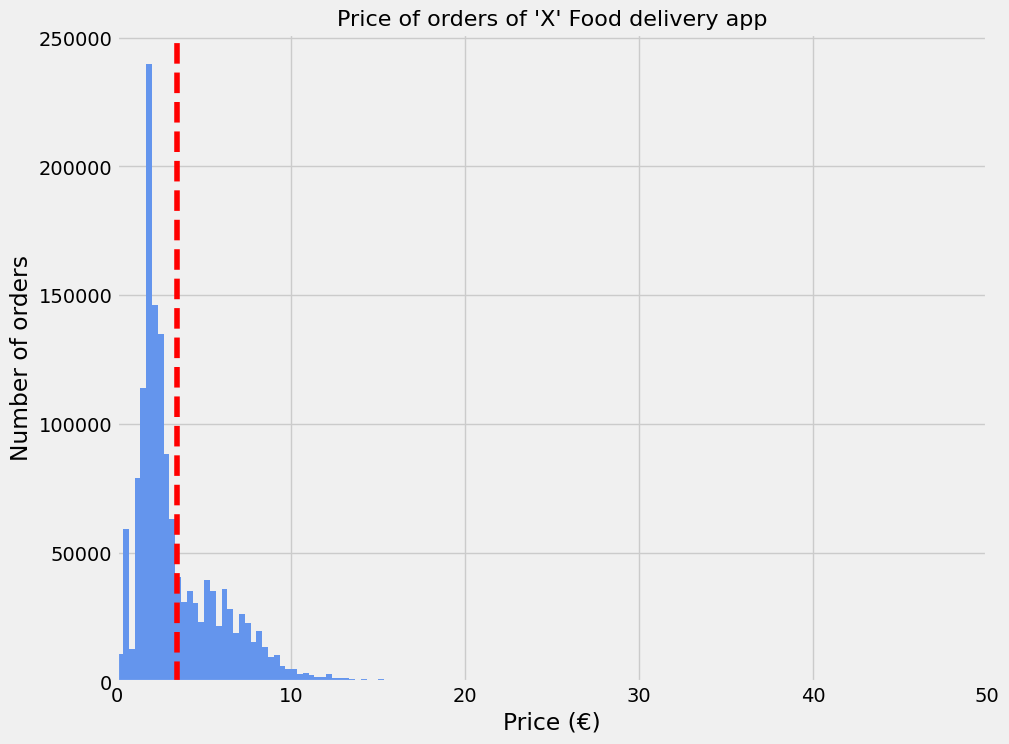

In [53]:
# Distribution of prices
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=(10,8))
df.item_price.hist(bins=150, range=(0,50),color='cornflowerblue')
plt.margins(x=0)
plt.axvline(df.item_price.mean(), color='red', linestyle='--')
plt.title("Price of orders of 'X' Food delivery app", fontsize=16)
plt.xlabel("Price (€)")
plt.ylabel("Number of orders")
plt.show()

<ipython-input-55-cba418802314>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


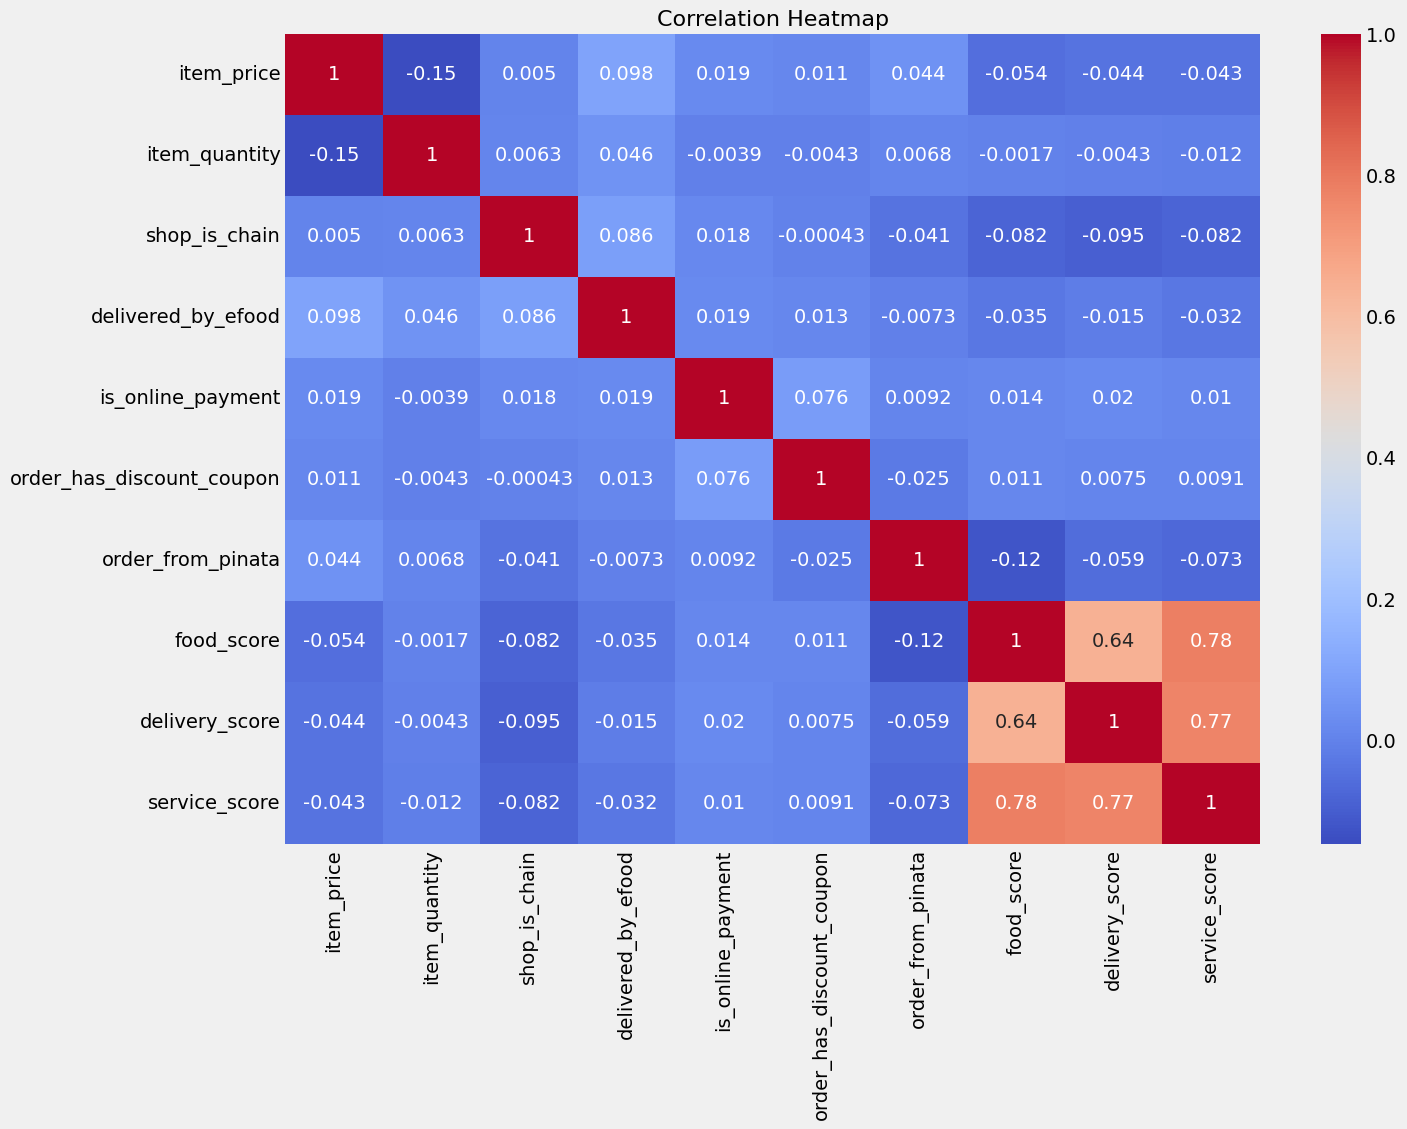

In [55]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=16)
plt.yticks(rotation =0)
plt.show()

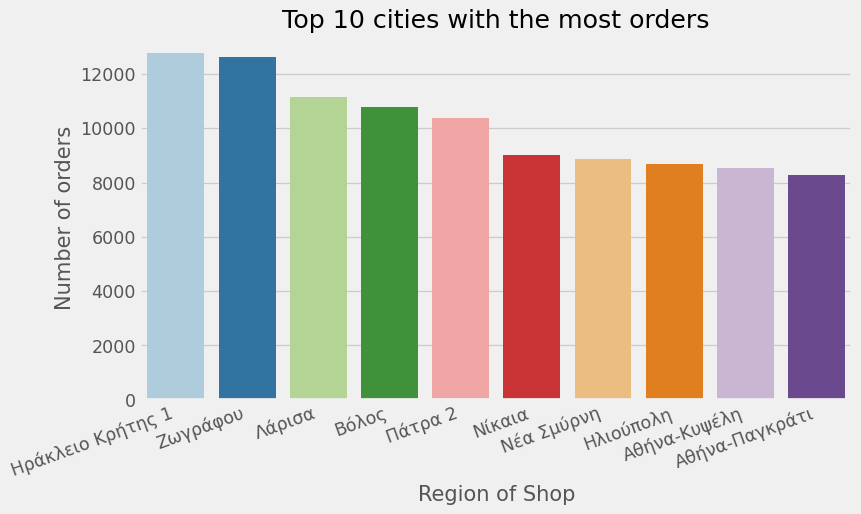

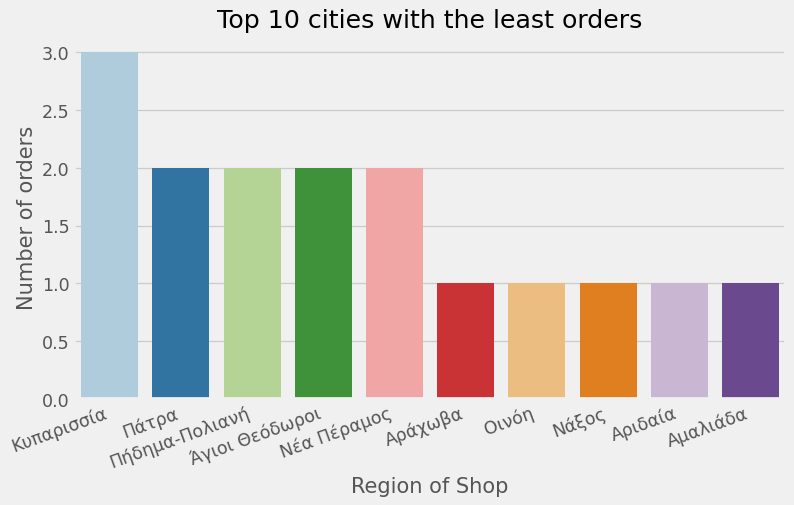

In [62]:
# Visualizing top and bottom 10 cities based on total orders 
# sns.color_palette("pastel")
plt.figure(figsize=(20,5),dpi=90)
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
fig=sns.barplot(data=region_order.head(10),x="geographical_region_of_shop",y="Order_Count",palette='Paired')
plt.title("Top 10 cities with the most orders")
plt.xlabel("Region of Shop")
plt.ylabel("Number of orders")
plt.show(fig)

plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
fig2=sns.barplot(data=region_order.tail(10),x="geographical_region_of_shop",y="Order_Count",palette='Paired')
plt.title("Top 10 cities with the least orders")
plt.xlabel("Region of Shop")
plt.ylabel("Number of orders")
plt.show(fig2)

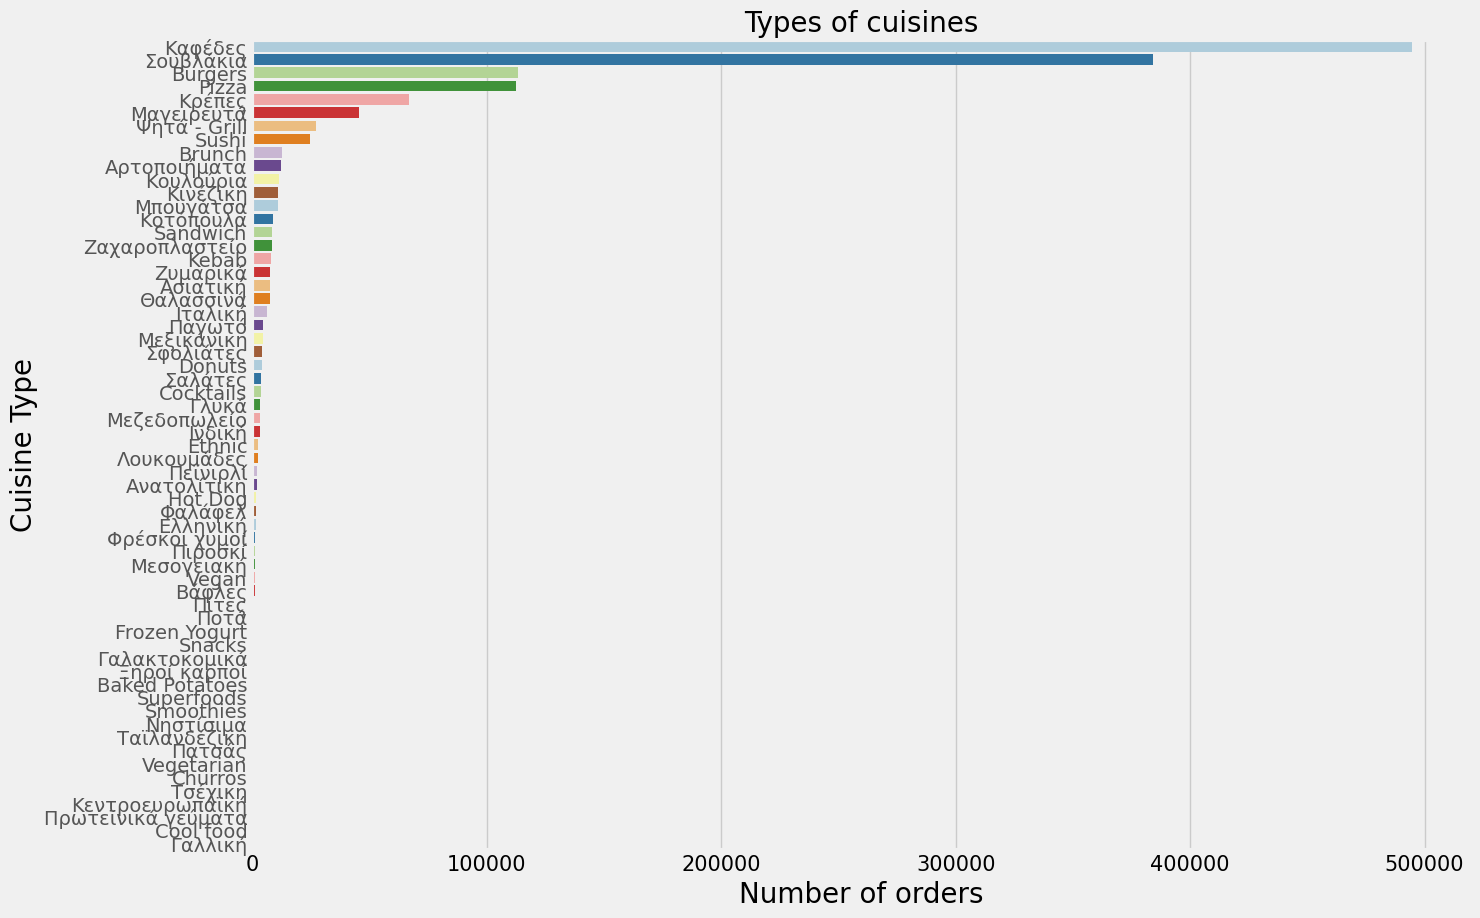

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,10))
sns.countplot(y = 'shop_cuisine',data = df,order = df['shop_cuisine'].value_counts().index,palette = "Paired")
plt.ylabel('Cuisine Type',fontsize = 20,color='black')
plt.xlabel('Number of orders',fontsize = 20,color='black')
plt.title('Types of cuisines',fontsize = 20)
plt.xticks(color='black',fontsize=15)
plt.show()

In [65]:
#create a dataframe with the categories only
df_categories = pd.DataFrame(df['category_name'].unique()).rename(columns = {0:'Description'})
df_categories

,Description
0,Μερίδες της ώρας
1,Με το κιλό
2,Φρέσκες σαλάτες ατομικές
3,Τυλιχτά
4,Καφέδες
...,...
17055,Liquers
17056,Our favourites Fried chicken burger προσφοράς
17057,Vitamin point
17058,Noodles combo 2 Coca-Cola deals


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

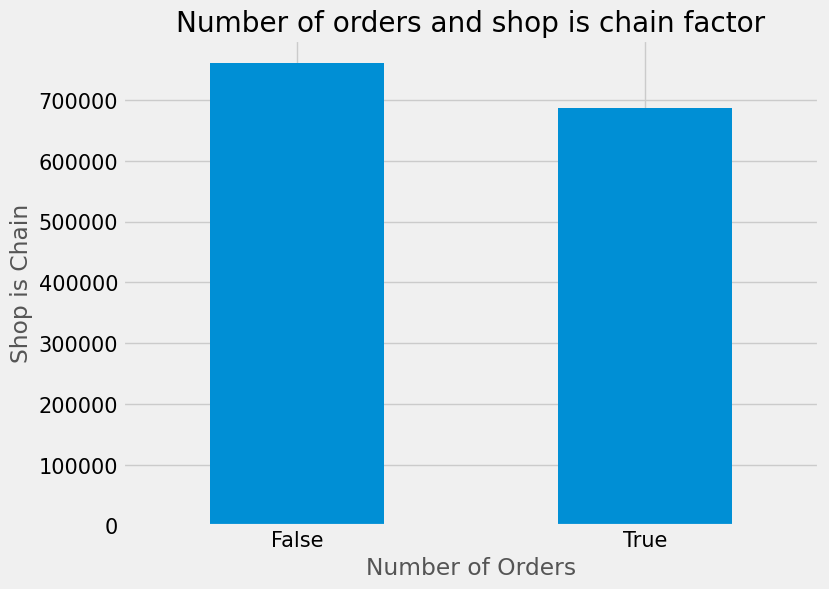

In [66]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight') 
df['shop_is_chain'].value_counts().plot(kind='bar')
plt.title("Number of orders and shop is chain factor")
plt.ylabel("Shop is Chain")
plt.xlabel("Number of Orders")
plt.yticks(fontsize=15,color='black')
plt.xticks(rotation=0,fontsize=15,color='black')

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 200000.0, '0.2'),
  Text(0, 400000.0, '0.4'),
  Text(0, 600000.0, '0.6'),
  Text(0, 800000.0, '0.8'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1200000.0, '1.2'),
  Text(0, 1400000.0, '1.4'),
  Text(0, 1600000.0, '1.6')])

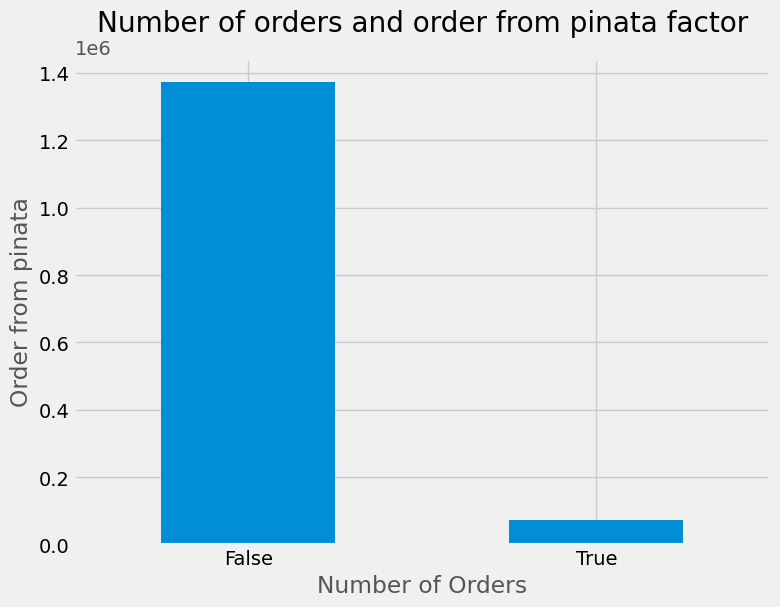

In [67]:
plt.figure(figsize=(8,6))
df['order_from_pinata'].value_counts().plot(kind='bar')
plt.title("Number of orders and order from pinata factor")
plt.ylabel("Order from pinata")
plt.xlabel("Number of Orders")
plt.xticks(fontsize=14,color='black',rotation=0)
plt.yticks(fontsize=14,color='black')

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

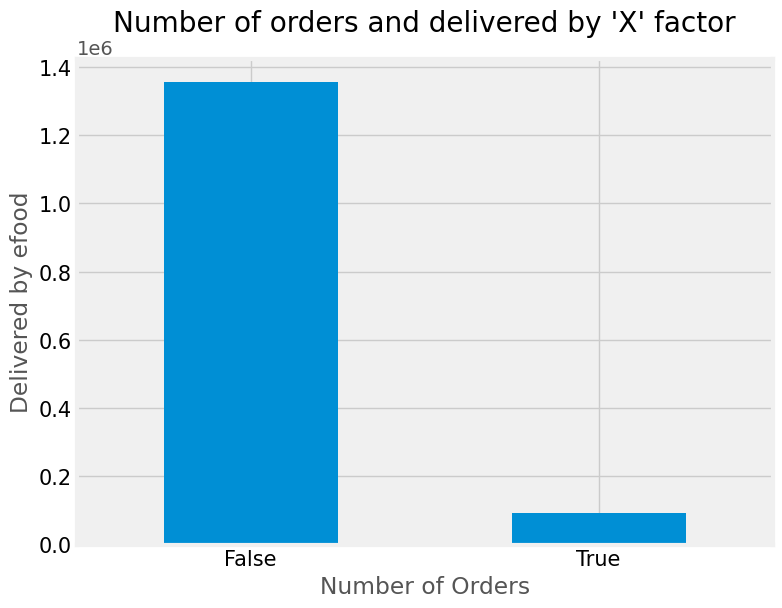

In [69]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
df['delivered_by_efood'].value_counts().plot(kind='bar')
plt.title("Number of orders and delivered by 'X' factor")
plt.yticks(fontsize=15,color='black')
plt.xticks(fontsize=15,color='black')
plt.ylabel("Delivered by efood")
plt.xlabel("Number of Orders")
plt.xticks(rotation=0)

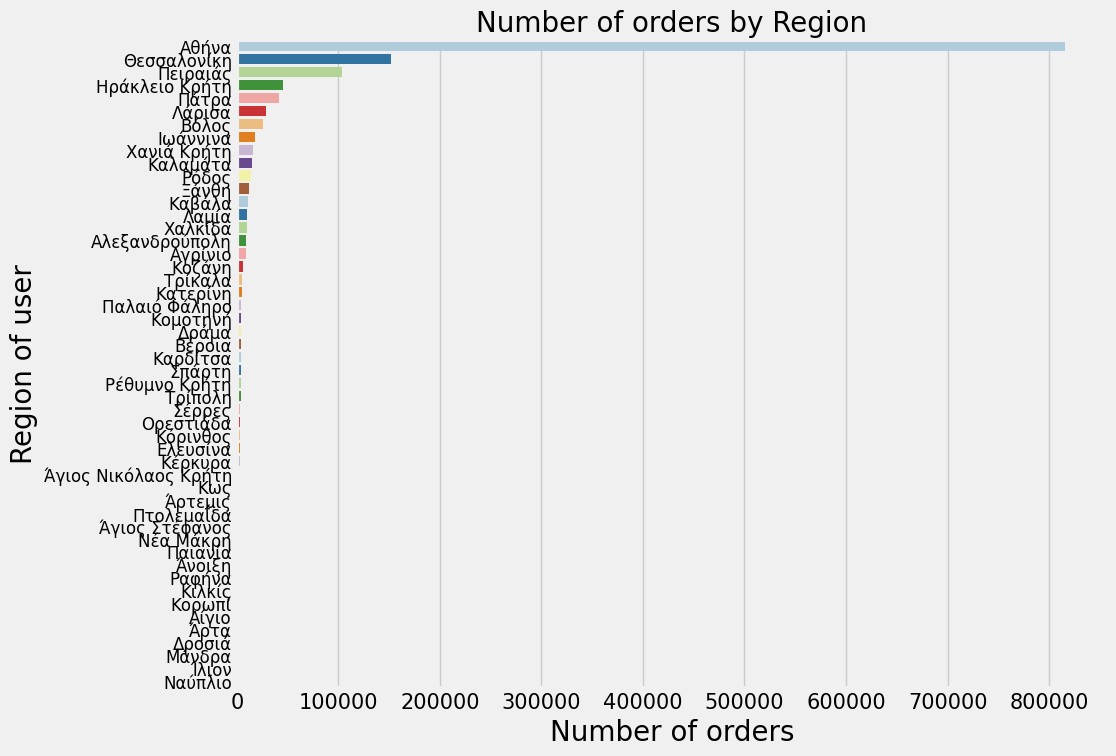

In [71]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
sns.countplot(y = 'geographical_region_of_user',data = df,order = df['geographical_region_of_user'].value_counts().nlargest(50).index,palette = "Paired")
plt.ylabel('Region of user',fontsize = 20,color='black')
plt.xlabel('Number of orders',fontsize = 20,color='black')
plt.yticks(fontsize=12,color='black')
plt.xticks(fontsize=15,color='black')
plt.title('Number of orders by Region',fontsize = 20)
plt.show()

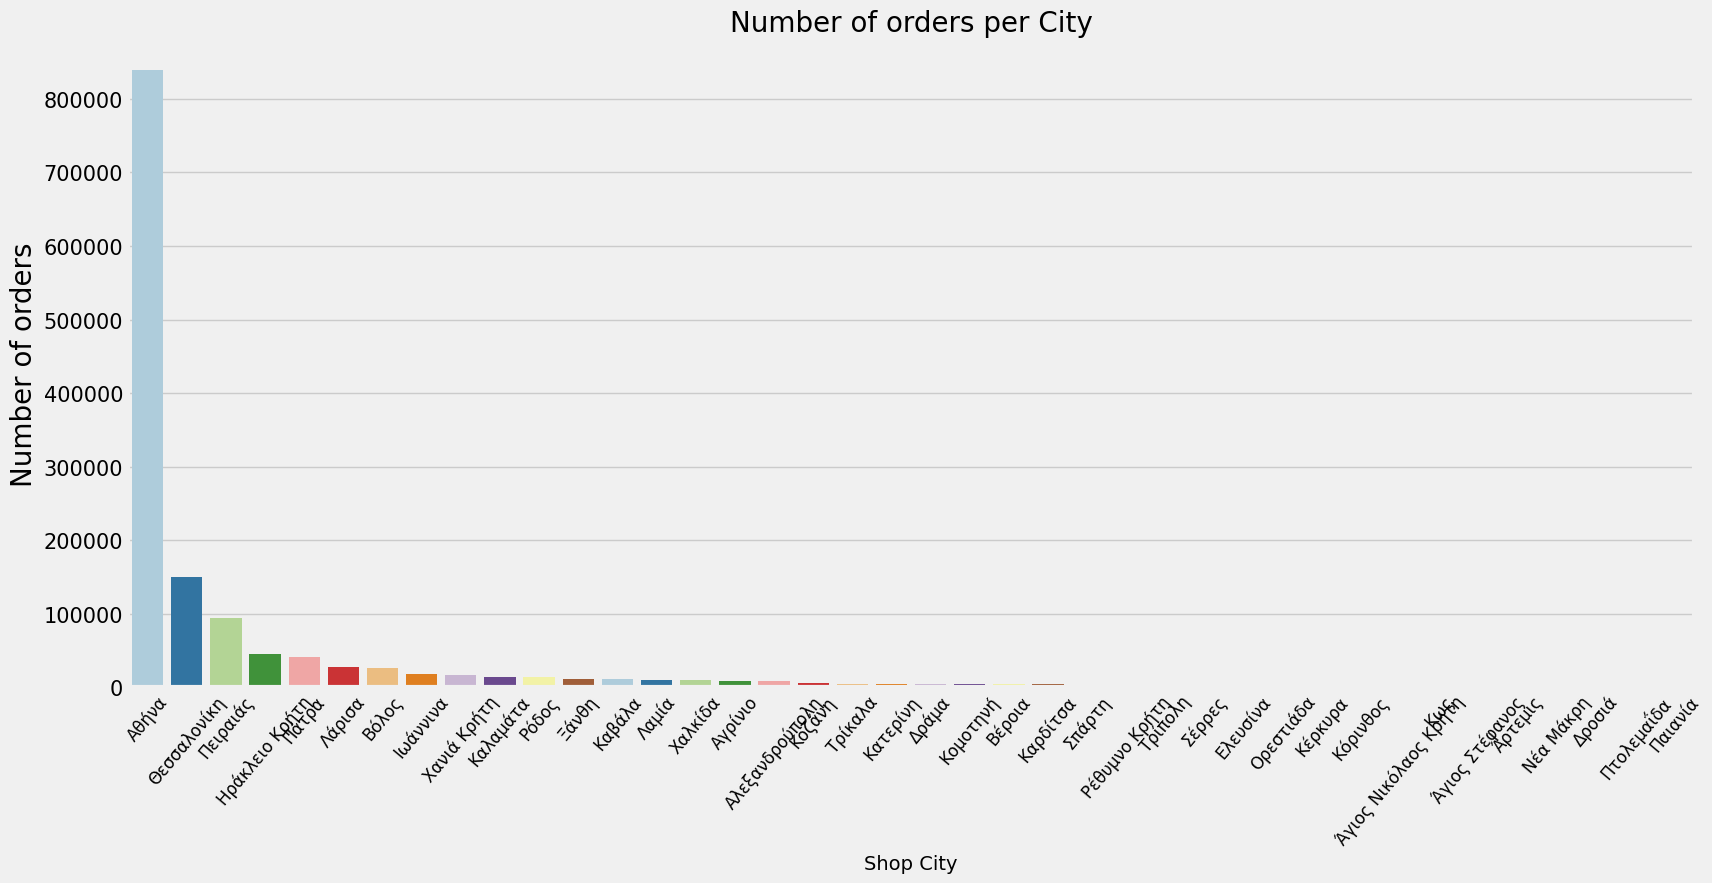

In [72]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'shop_city',data = df,order = df['shop_city'].value_counts().nlargest(40).index,palette = "Paired")
plt.ylabel('Number of orders',fontsize = 20,color='black')
plt.xlabel('Shop City',fontsize = 14,color='black')
plt.xticks(rotation=50,color='black',fontsize=12)
plt.yticks(color='black',fontsize=15)
plt.title('Number of orders per City',fontsize = 20)
plt.show()

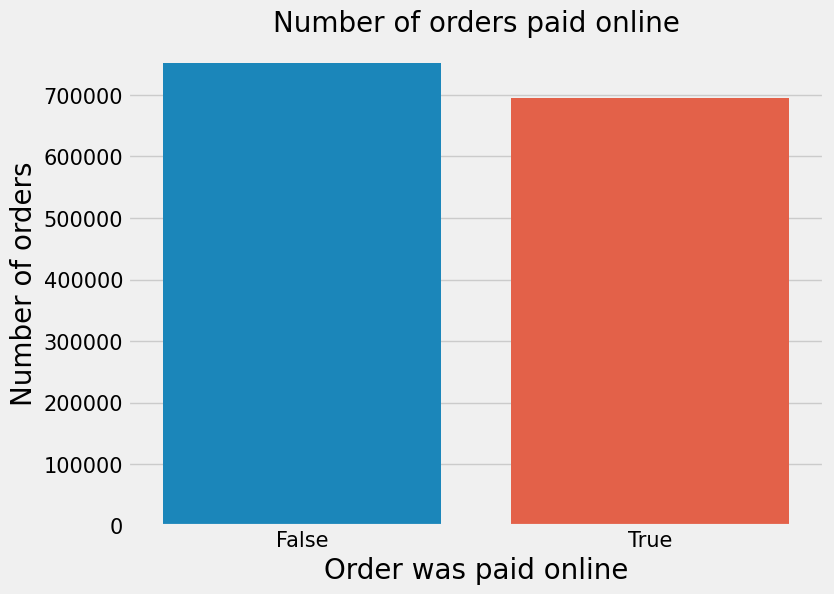

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'is_online_payment',data = df,order = df['is_online_payment'].value_counts().index)
plt.ylabel('Number of orders',fontsize = 20,color='black')
plt.xticks(color='black',fontsize=15)
plt.yticks(color='black',fontsize=15)
plt.xlabel('Order was paid online',fontsize = 20,color='black')
plt.title('Number of orders paid online',fontsize = 20)
plt.show()

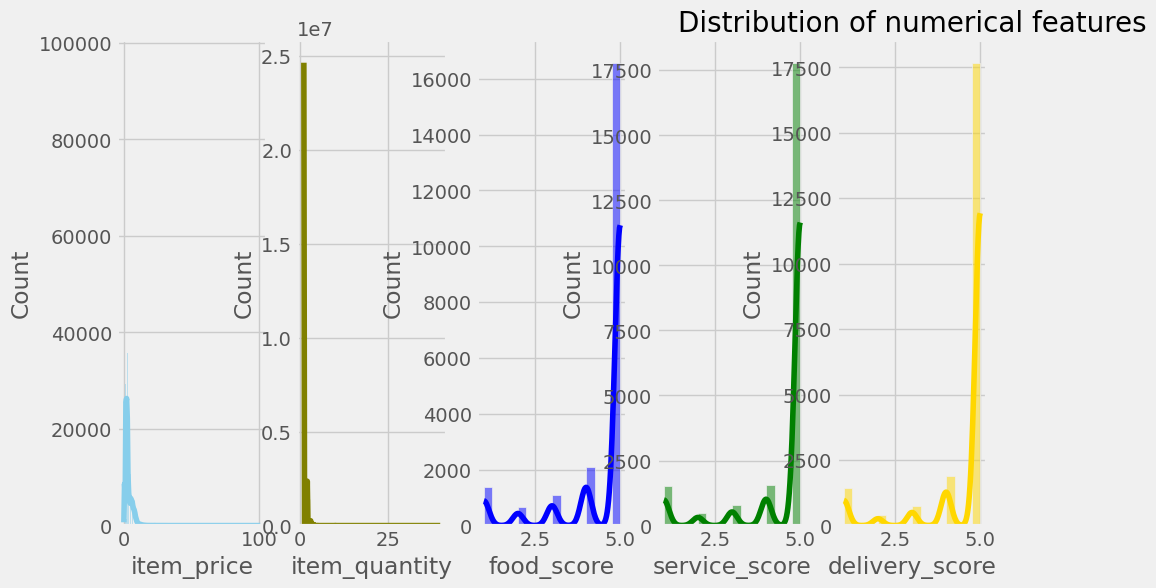

In [75]:
fig, axs = plt.subplots(1,5)
sns.histplot(data=df, x="item_price", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="item_quantity", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="food_score", kde=True, color="blue", ax=axs[2])
sns.histplot(data=df, x="service_score", kde=True, color="green", ax=axs[3])
sns.histplot(data=df, x="delivery_score", kde=True, color="gold", ax=axs[4])
plt.title('Distribution of numerical features',fontsize = 20)
plt.show()

<ipython-input-76-8dff59369e20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby("geographical_region_of_shop").filter(lambda x: len(x)>1000).groupby("geographical_region_of_shop").mean()["item_price"].reset_index().sort_values("item_price", ascending=False)
<ipython-input-76-8dff59369e20>:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(10)
<ipython-input-76-8dff59369e20>:16: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


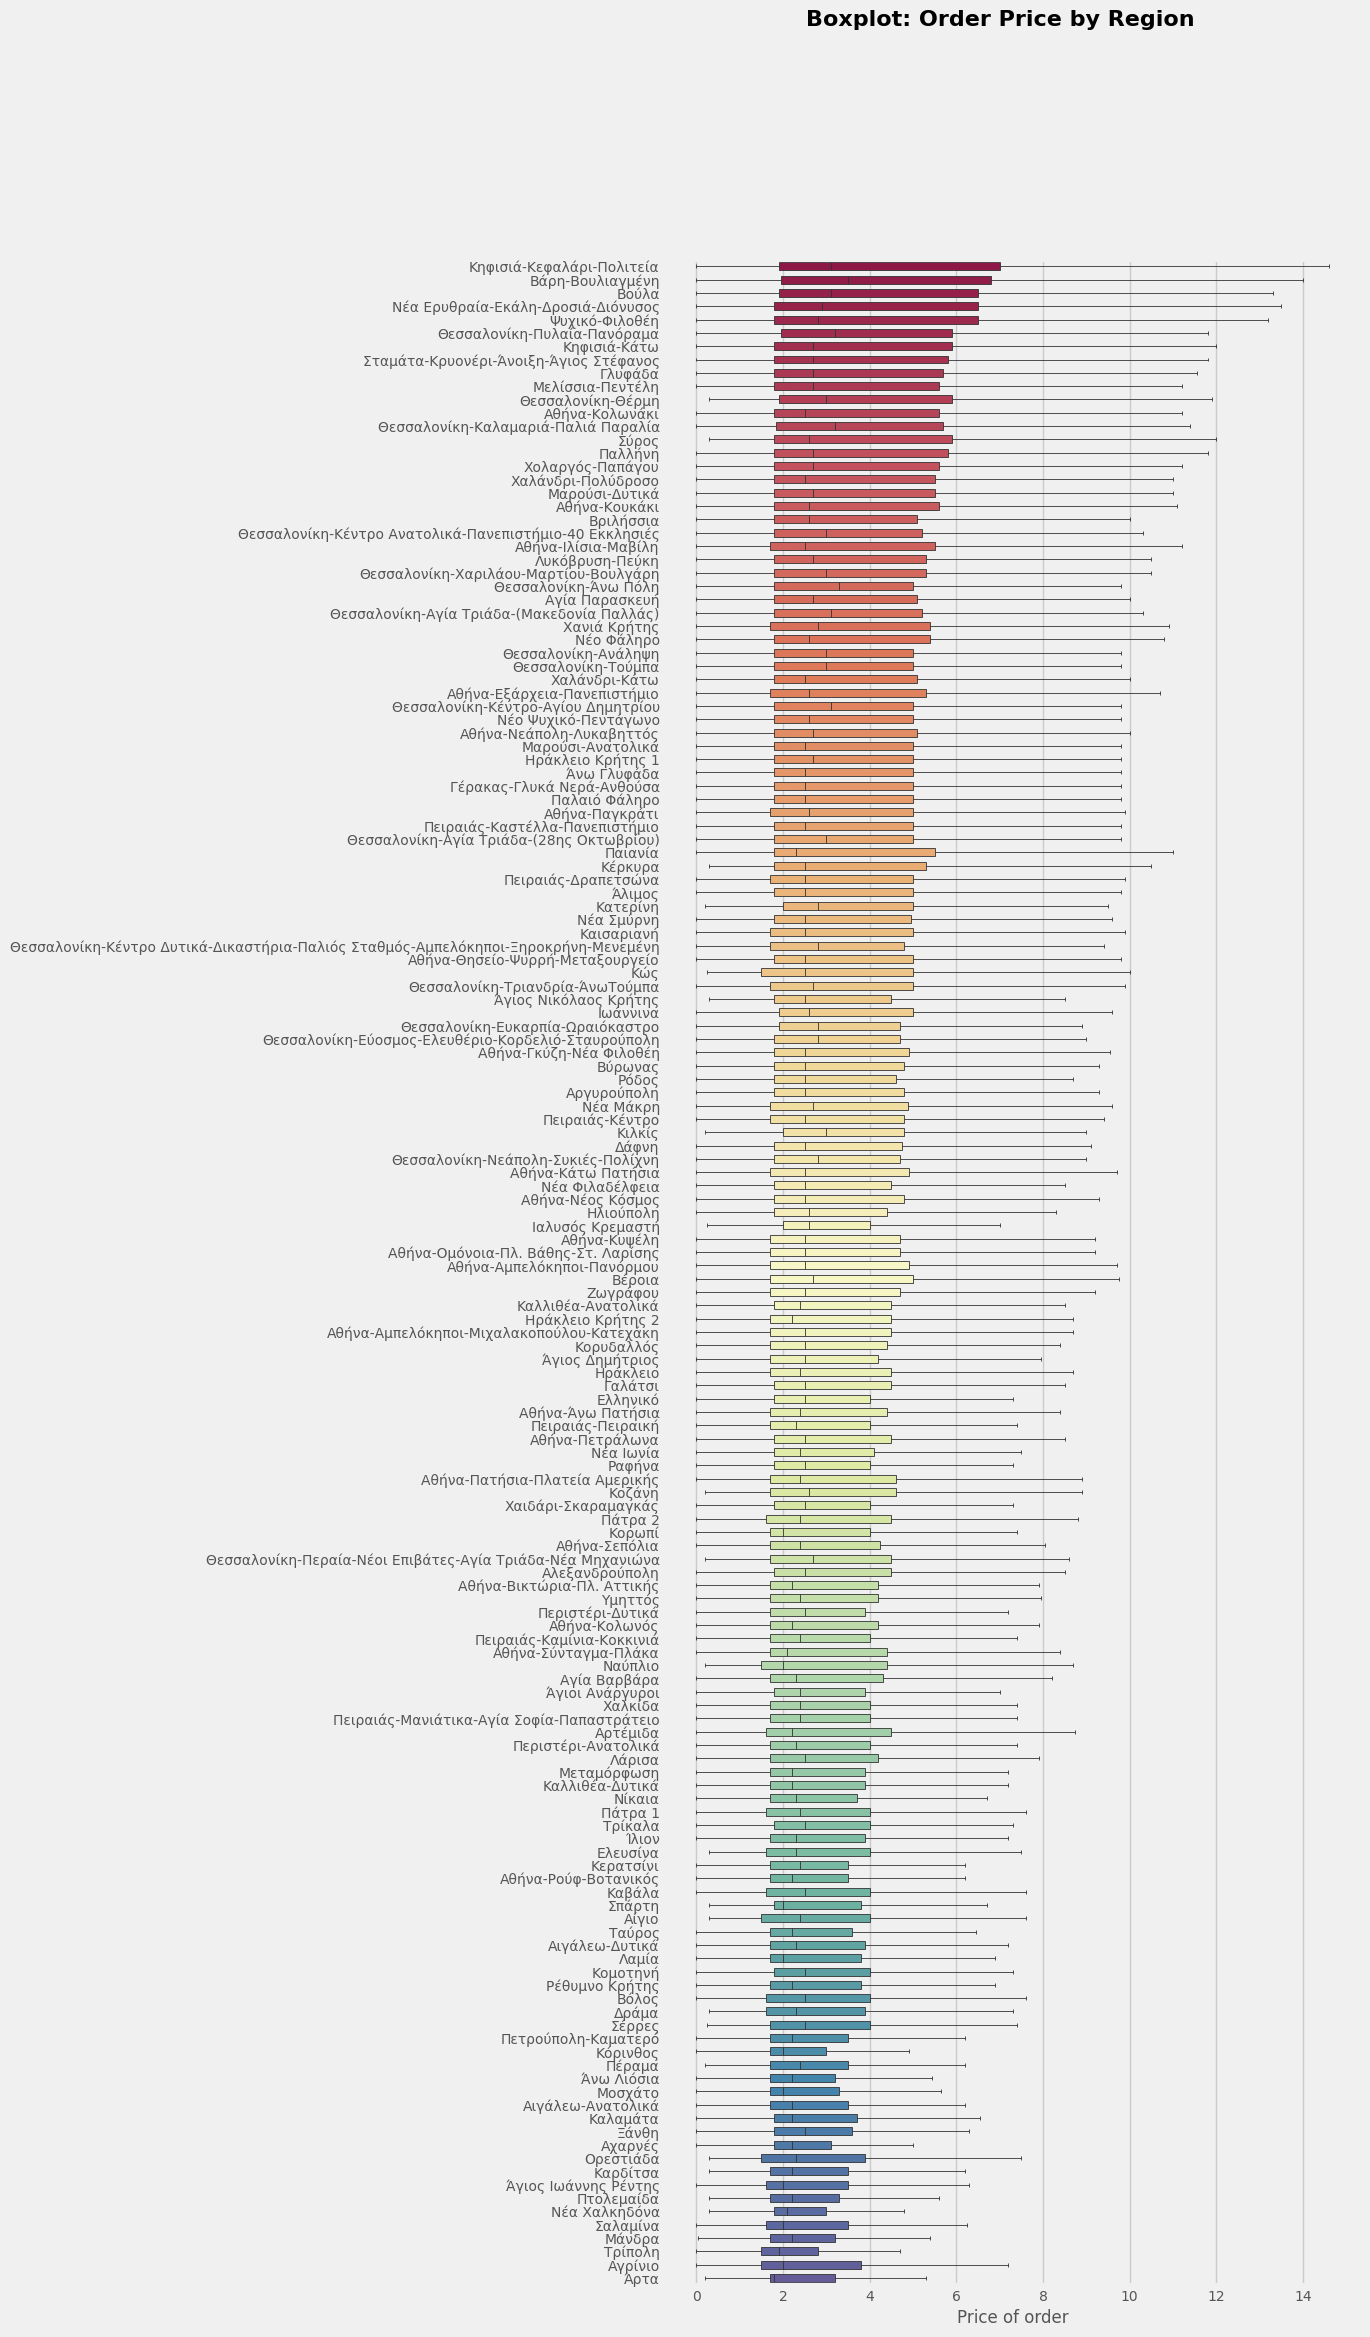

In [76]:
df1 = df.groupby("geographical_region_of_shop").filter(lambda x: len(x)>1000).groupby("geographical_region_of_shop").mean()["item_price"].reset_index().sort_values("item_price", ascending=False)
dft = df[["geographical_region_of_shop", "item_price"]].copy()
plt.figure(figsize=(8,25))
sns.boxplot(x='item_price', y='geographical_region_of_shop', data=dft, order=df1["geographical_region_of_shop"].values,
            showfliers = False, palette="Spectral", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Price of order", fontsize=12)
ax.set_ylabel("")
plt.suptitle("Boxplot: Order Price by Region", fontweight="bold", fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

In [78]:
hourly_df = df_clean.groupby(['hour', 'day_of_week'])['order_id'].count().reset_index()

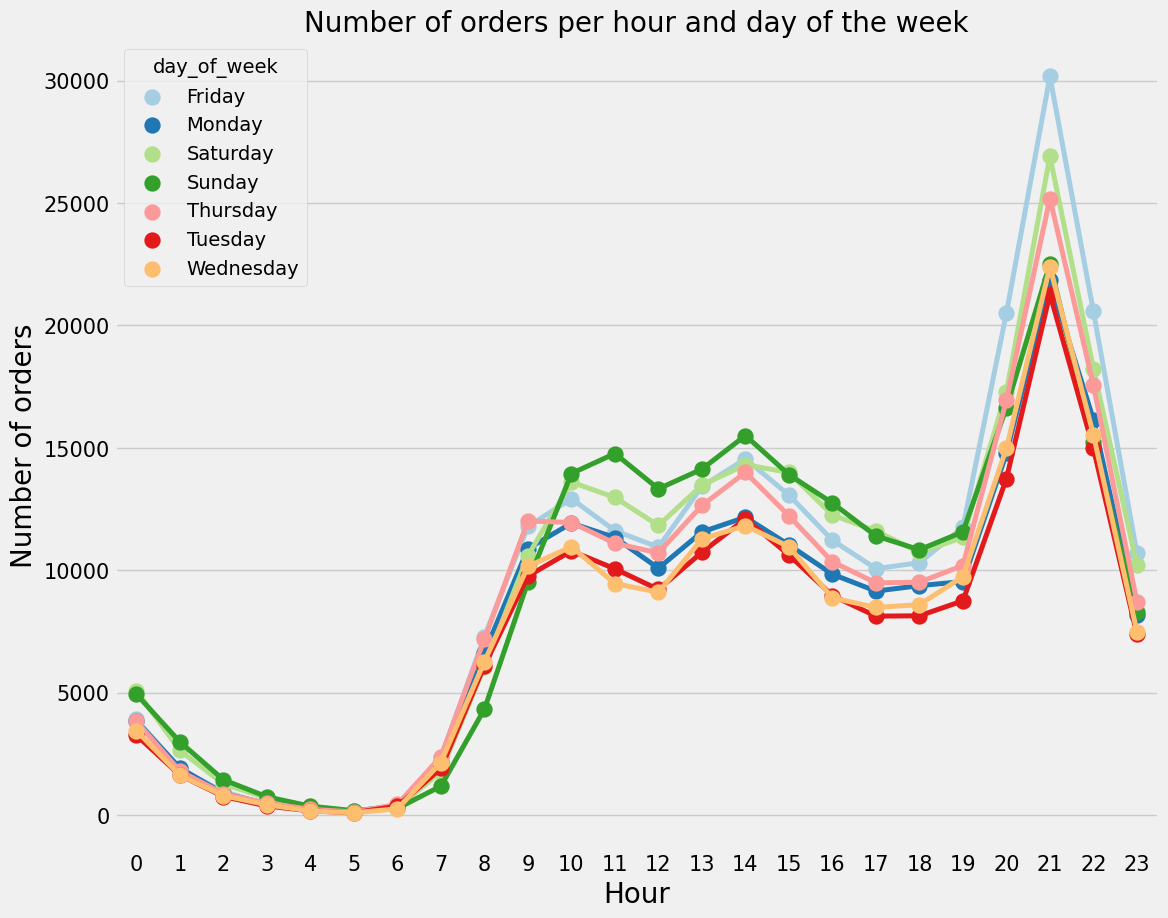

In [85]:
plt.figure(figsize=(12,10))
sns.light_palette("seagreen", as_cmap=True)
sns.pointplot(x='hour', y='order_id', hue='day_of_week', data=hourly_df,palette='Paired')
# Set line width for each line in the pointplot
for line in ax.lines:
    line.set_linewidth(2)
plt.ylabel('Number of orders',fontsize = 20,color='black')
plt.xticks(color='black',fontsize=15)
plt.yticks(color='black',fontsize=15)
plt.xlabel('Hour',fontsize = 20,color='black')
plt.title('Number of orders per hour and day of the week',fontsize = 20)
plt.show()

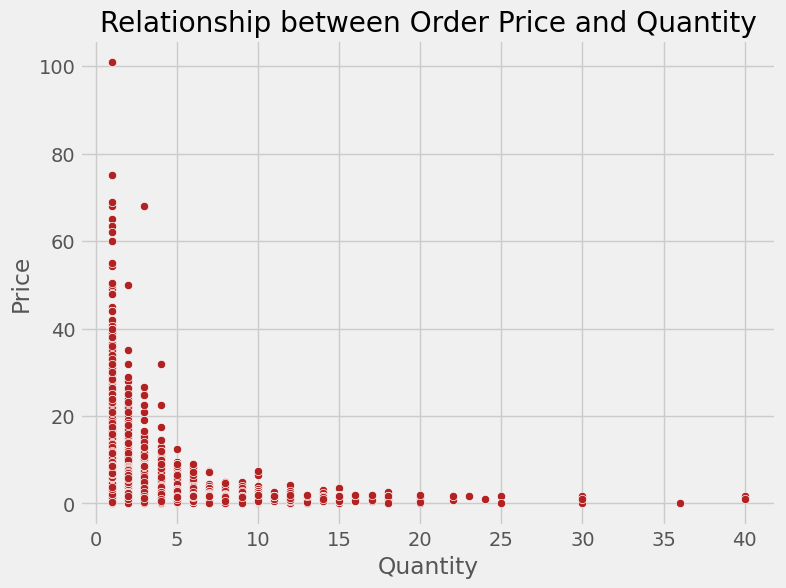

In [138]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title('Relationship between Order Price and Quantity')
sns.scatterplot(x='item_quantity', y='item_price', data=df, color='firebrick')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Date')

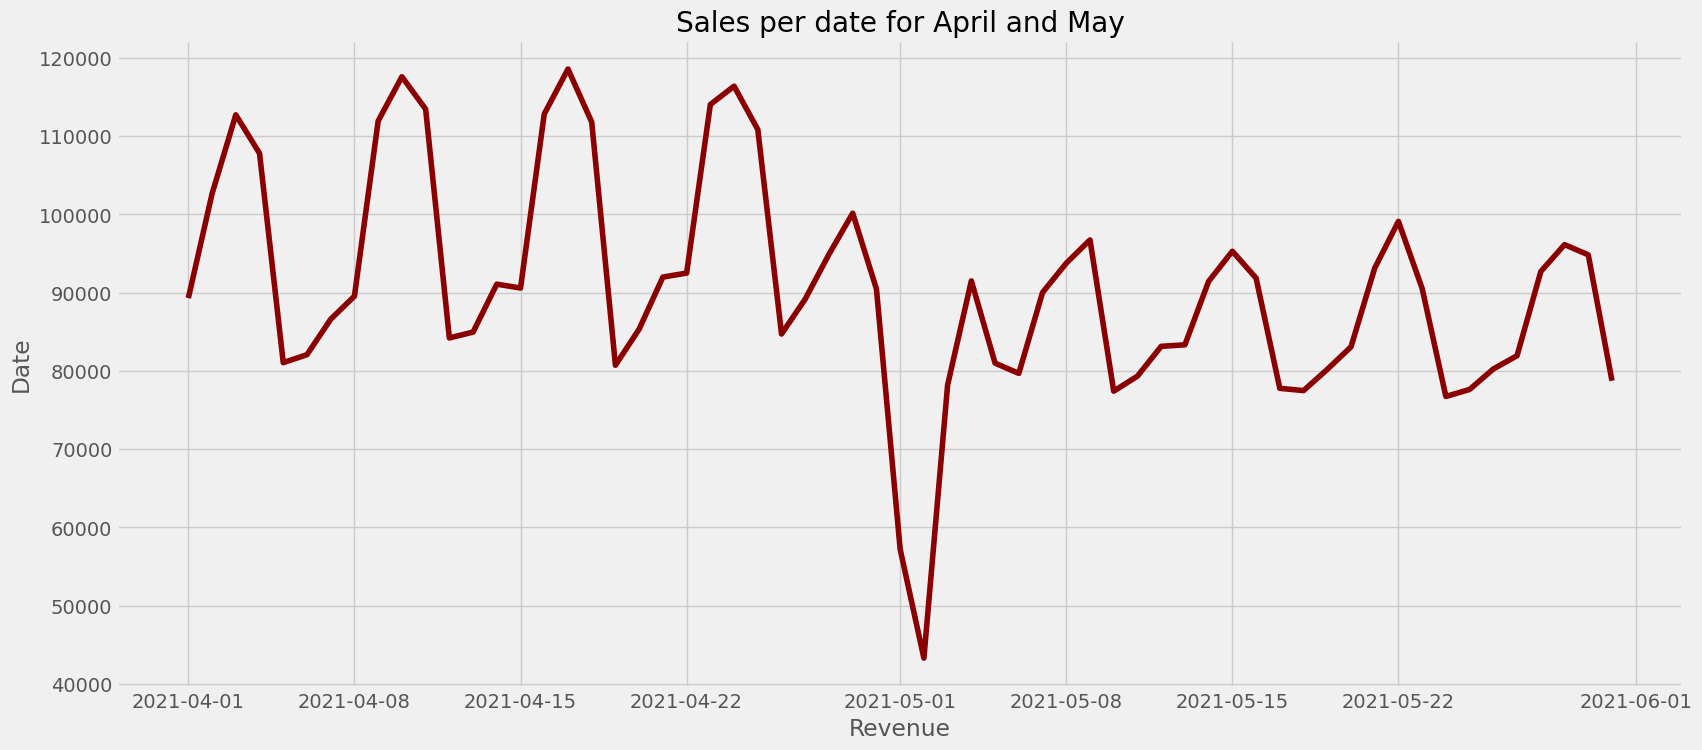

In [130]:
plt.figure(figsize=(18, 8))
plt.title('Sales per date for April and May')
splot = sns.lineplot(x='Date', y='TotalSum', data=df_clean.groupby('Date')['TotalSum'].sum().reset_index(),color='darkred')
plt.xlabel('Revenue')
plt.ylabel('Date')

<ipython-input-131-097a106716af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_exp=df_clean.groupby('order_id',as_index=False)['category_name','item_price'].max()


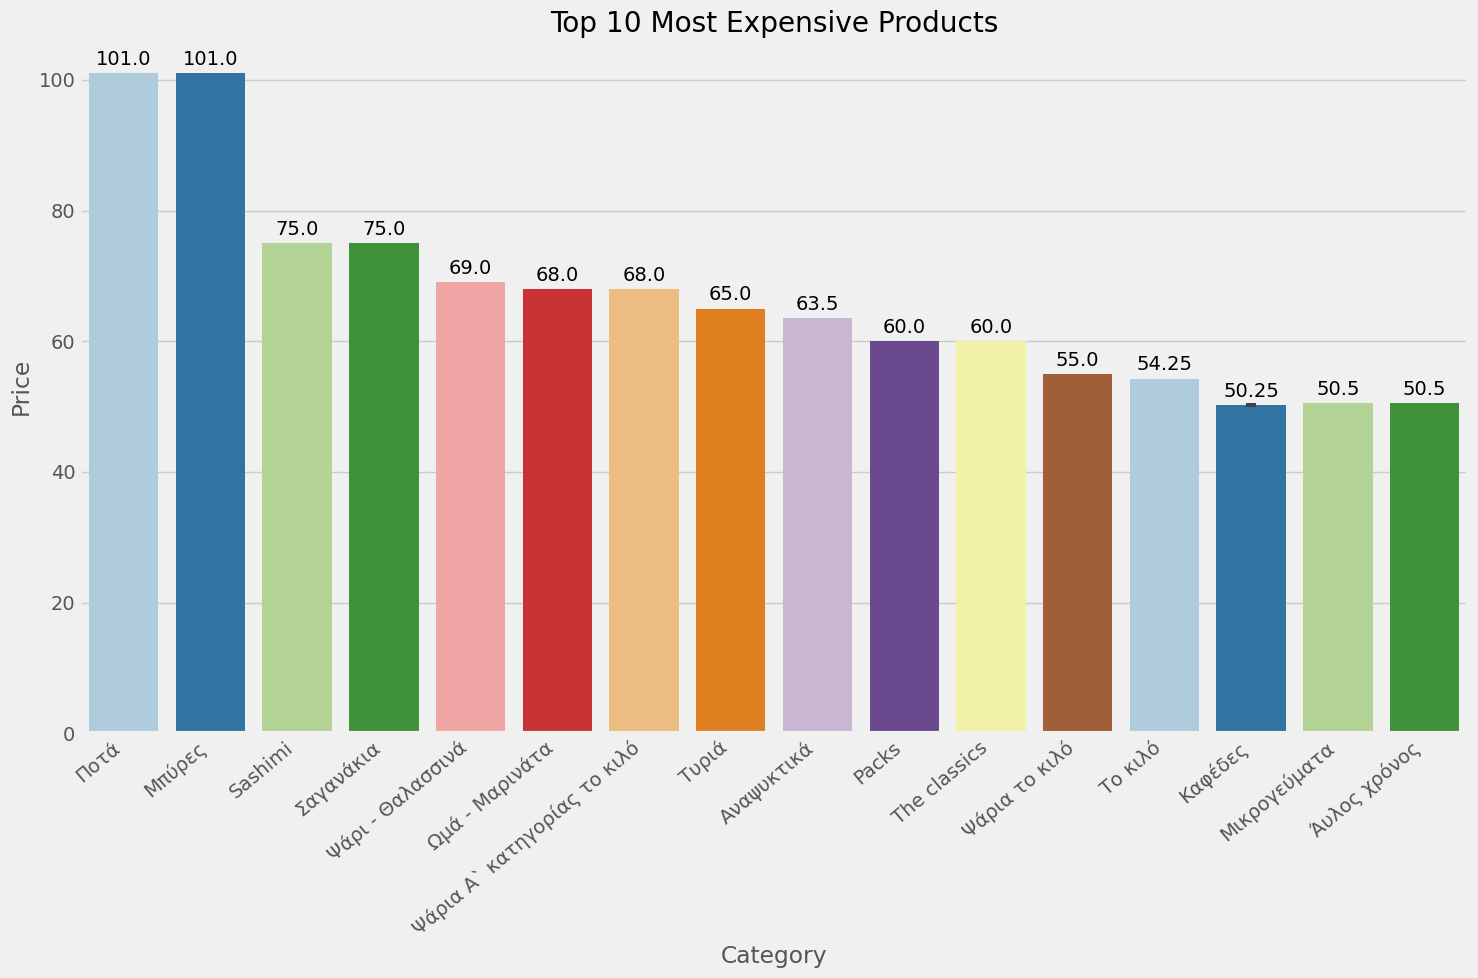

In [131]:
most_exp=df_clean.groupby('order_id',as_index=False)['category_name','item_price'].max()

plt.figure(figsize=(15, 10))
plt.title('Top 10 Most Expensive Products')
splot = sns.barplot(x='category_name',y='item_price',palette="Paired" ,data=most_exp.sort_values(by=('item_price'),ascending=False).head(20))
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


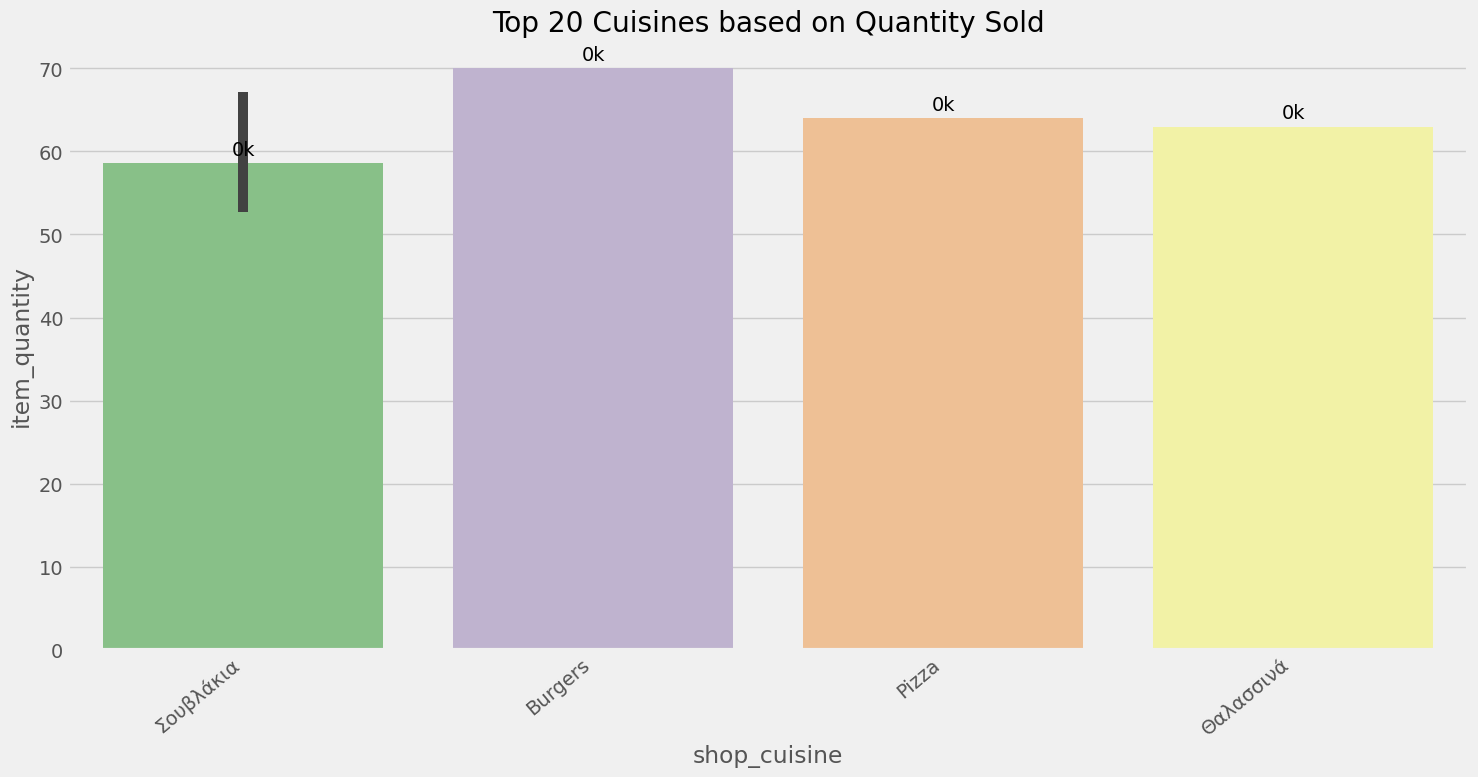

In [132]:
quantity_cat_sold=df_clean.groupby(['order_id','shop_cuisine'])['item_quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(15, 8))
plt.title('Top 20 Cuisines based on Quantity Sold')
splot = sns.barplot(x='shop_cuisine',y='item_quantity',data=quantity_cat_sold,palette='Accent')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

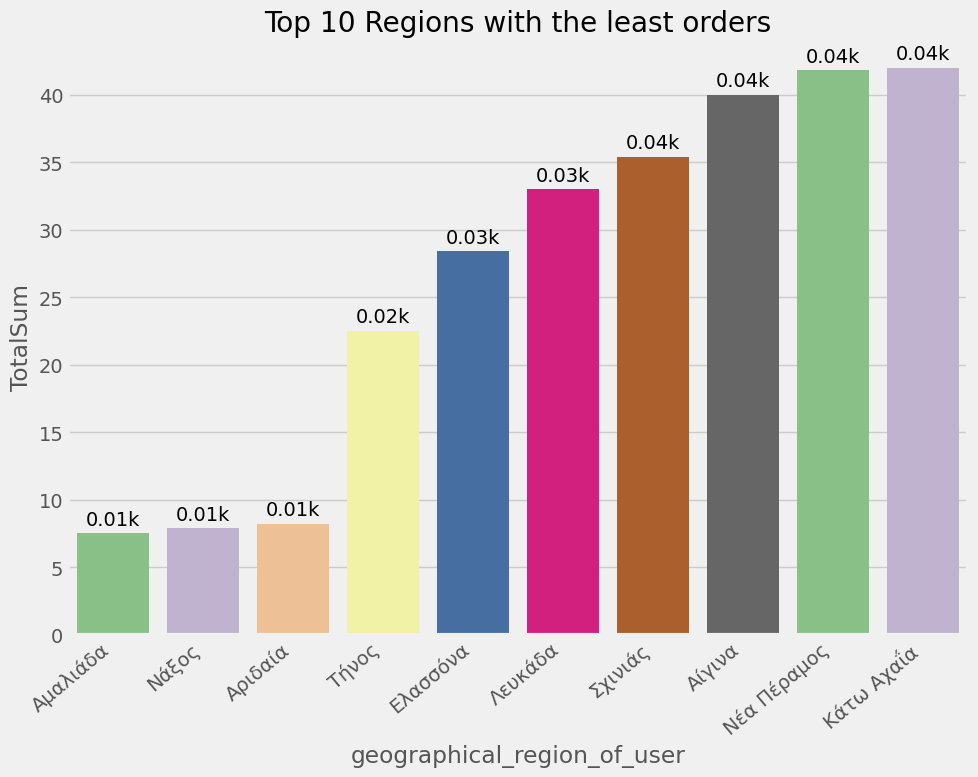

In [133]:
RegionSales=df_clean.groupby(['geographical_region_of_user'])['TotalSum'].sum().nsmallest(10).reset_index()
plt.figure(figsize=(10, 8))
plt.title('Top 10 Regions with the least orders')
splot = sns.barplot(x="geographical_region_of_user",y='TotalSum',palette="Accent",data=RegionSales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Orders per Day for April and May 2021'}, xlabel='day_of_week', ylabel='count'>

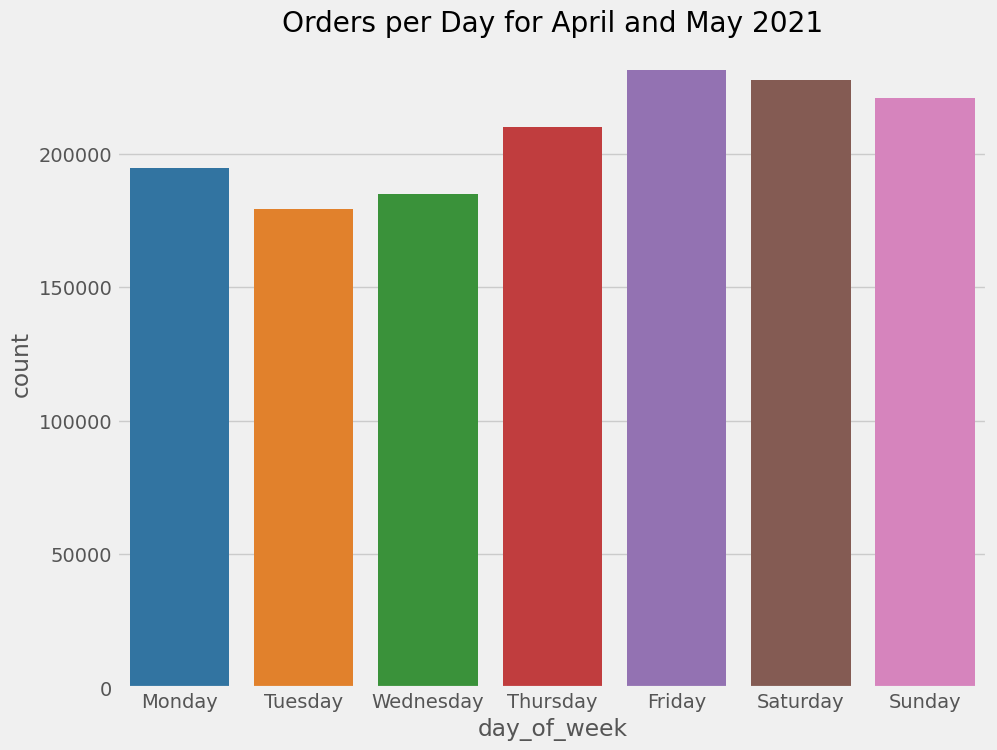

In [145]:
WeekDays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10, 8))
plt.title('Orders per Day for April and May 2021')
plt.xlabel('Day of week')
plt.ylabel('Number of Orders')
sns.countplot(x='day_of_week',order=WeekDays,palette="tab10",data=df)

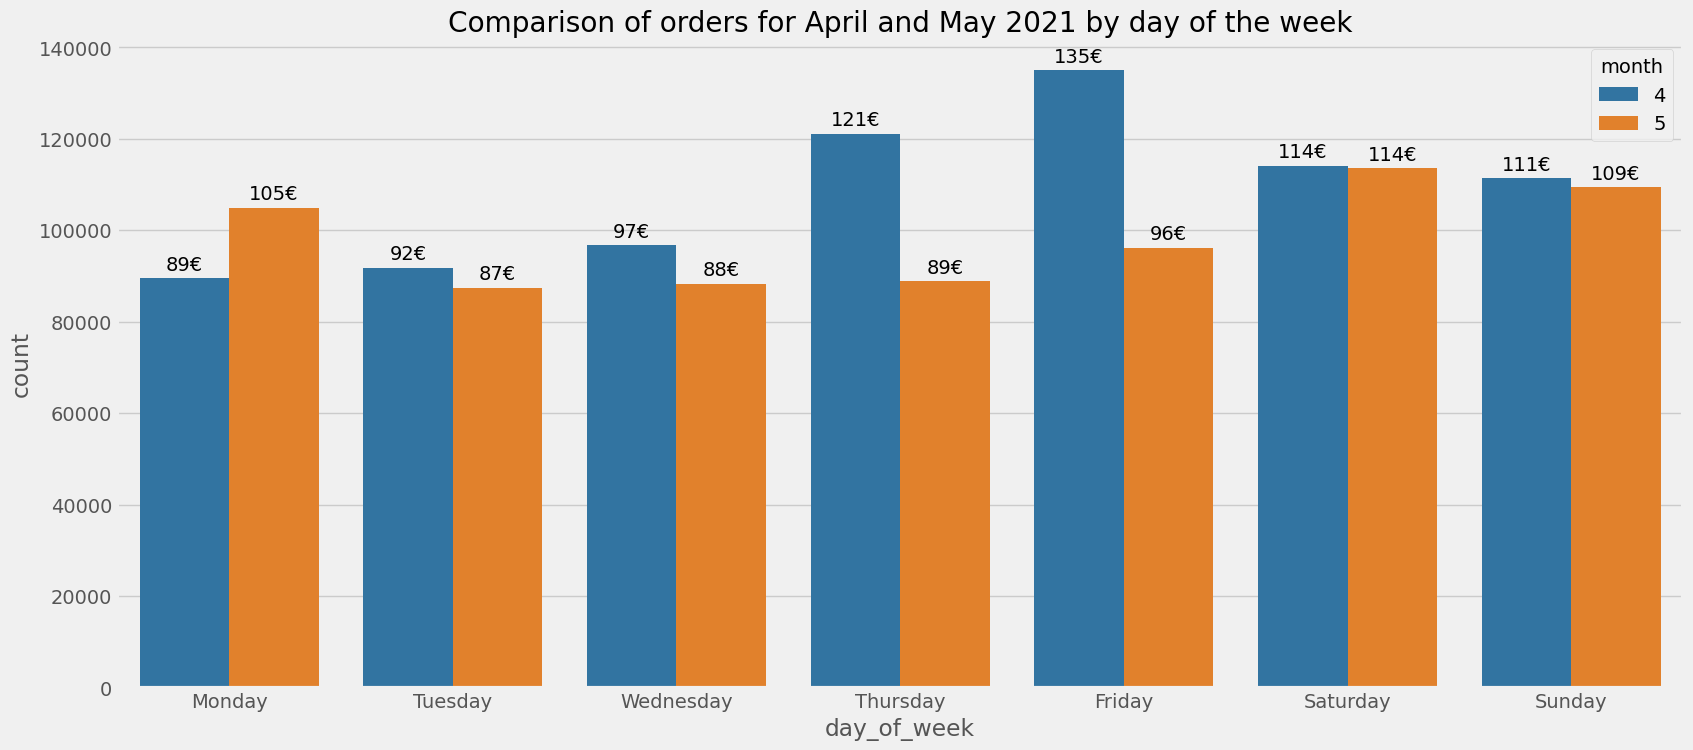

In [148]:
plt.figure(figsize=(18, 8))
plt.title('Comparison of orders for April and May 2021 by day of the week')
splot = sns.countplot(x='day_of_week',hue='month',palette='tab10',order=WeekDays,data=df.sort_values(by=['day_of_week']))
for p in splot.patches:
  if(p.get_height()>0):
    splot.annotate(format(round(p.get_height()/1000))+'€', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

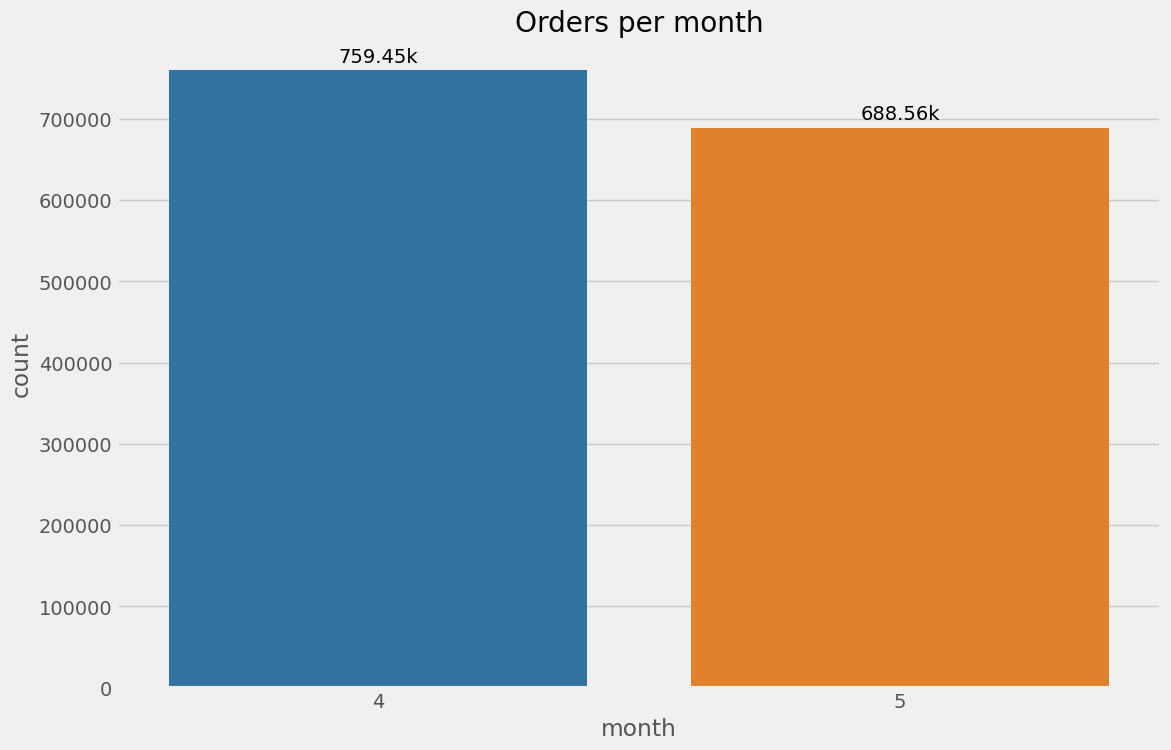

In [150]:
plt.figure(figsize=(12, 8))
plt.title('Orders per month')
splot = sns.countplot(x='month',data=df_clean,palette='tab10')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

## Thank you for making it so far, 
### The next part, after having explored the dataset is the RFM Clustering Methdology, in Notebook Part 2, which is available in my [GitHub](https://github.com/jenny-cobanaj/Field-Study-Project-Customer_Segmentation) portfolio.